# 机器学习小白篇

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import mglearn
from IPython.display import Pretty,Math,IFrame

In [2]:
%matplotlib inline

In [3]:
plt.style.use(['bmh','seaborn-bright'])
plt.rcParams['figure.dpi'] = 300

In [4]:
plt.rcParams["figure.figsize"]=[15,10]

In [5]:
import warnings; warnings.simplefilter('ignore')

## 入门例子

#### knn近邻分类演示

(26, 2)

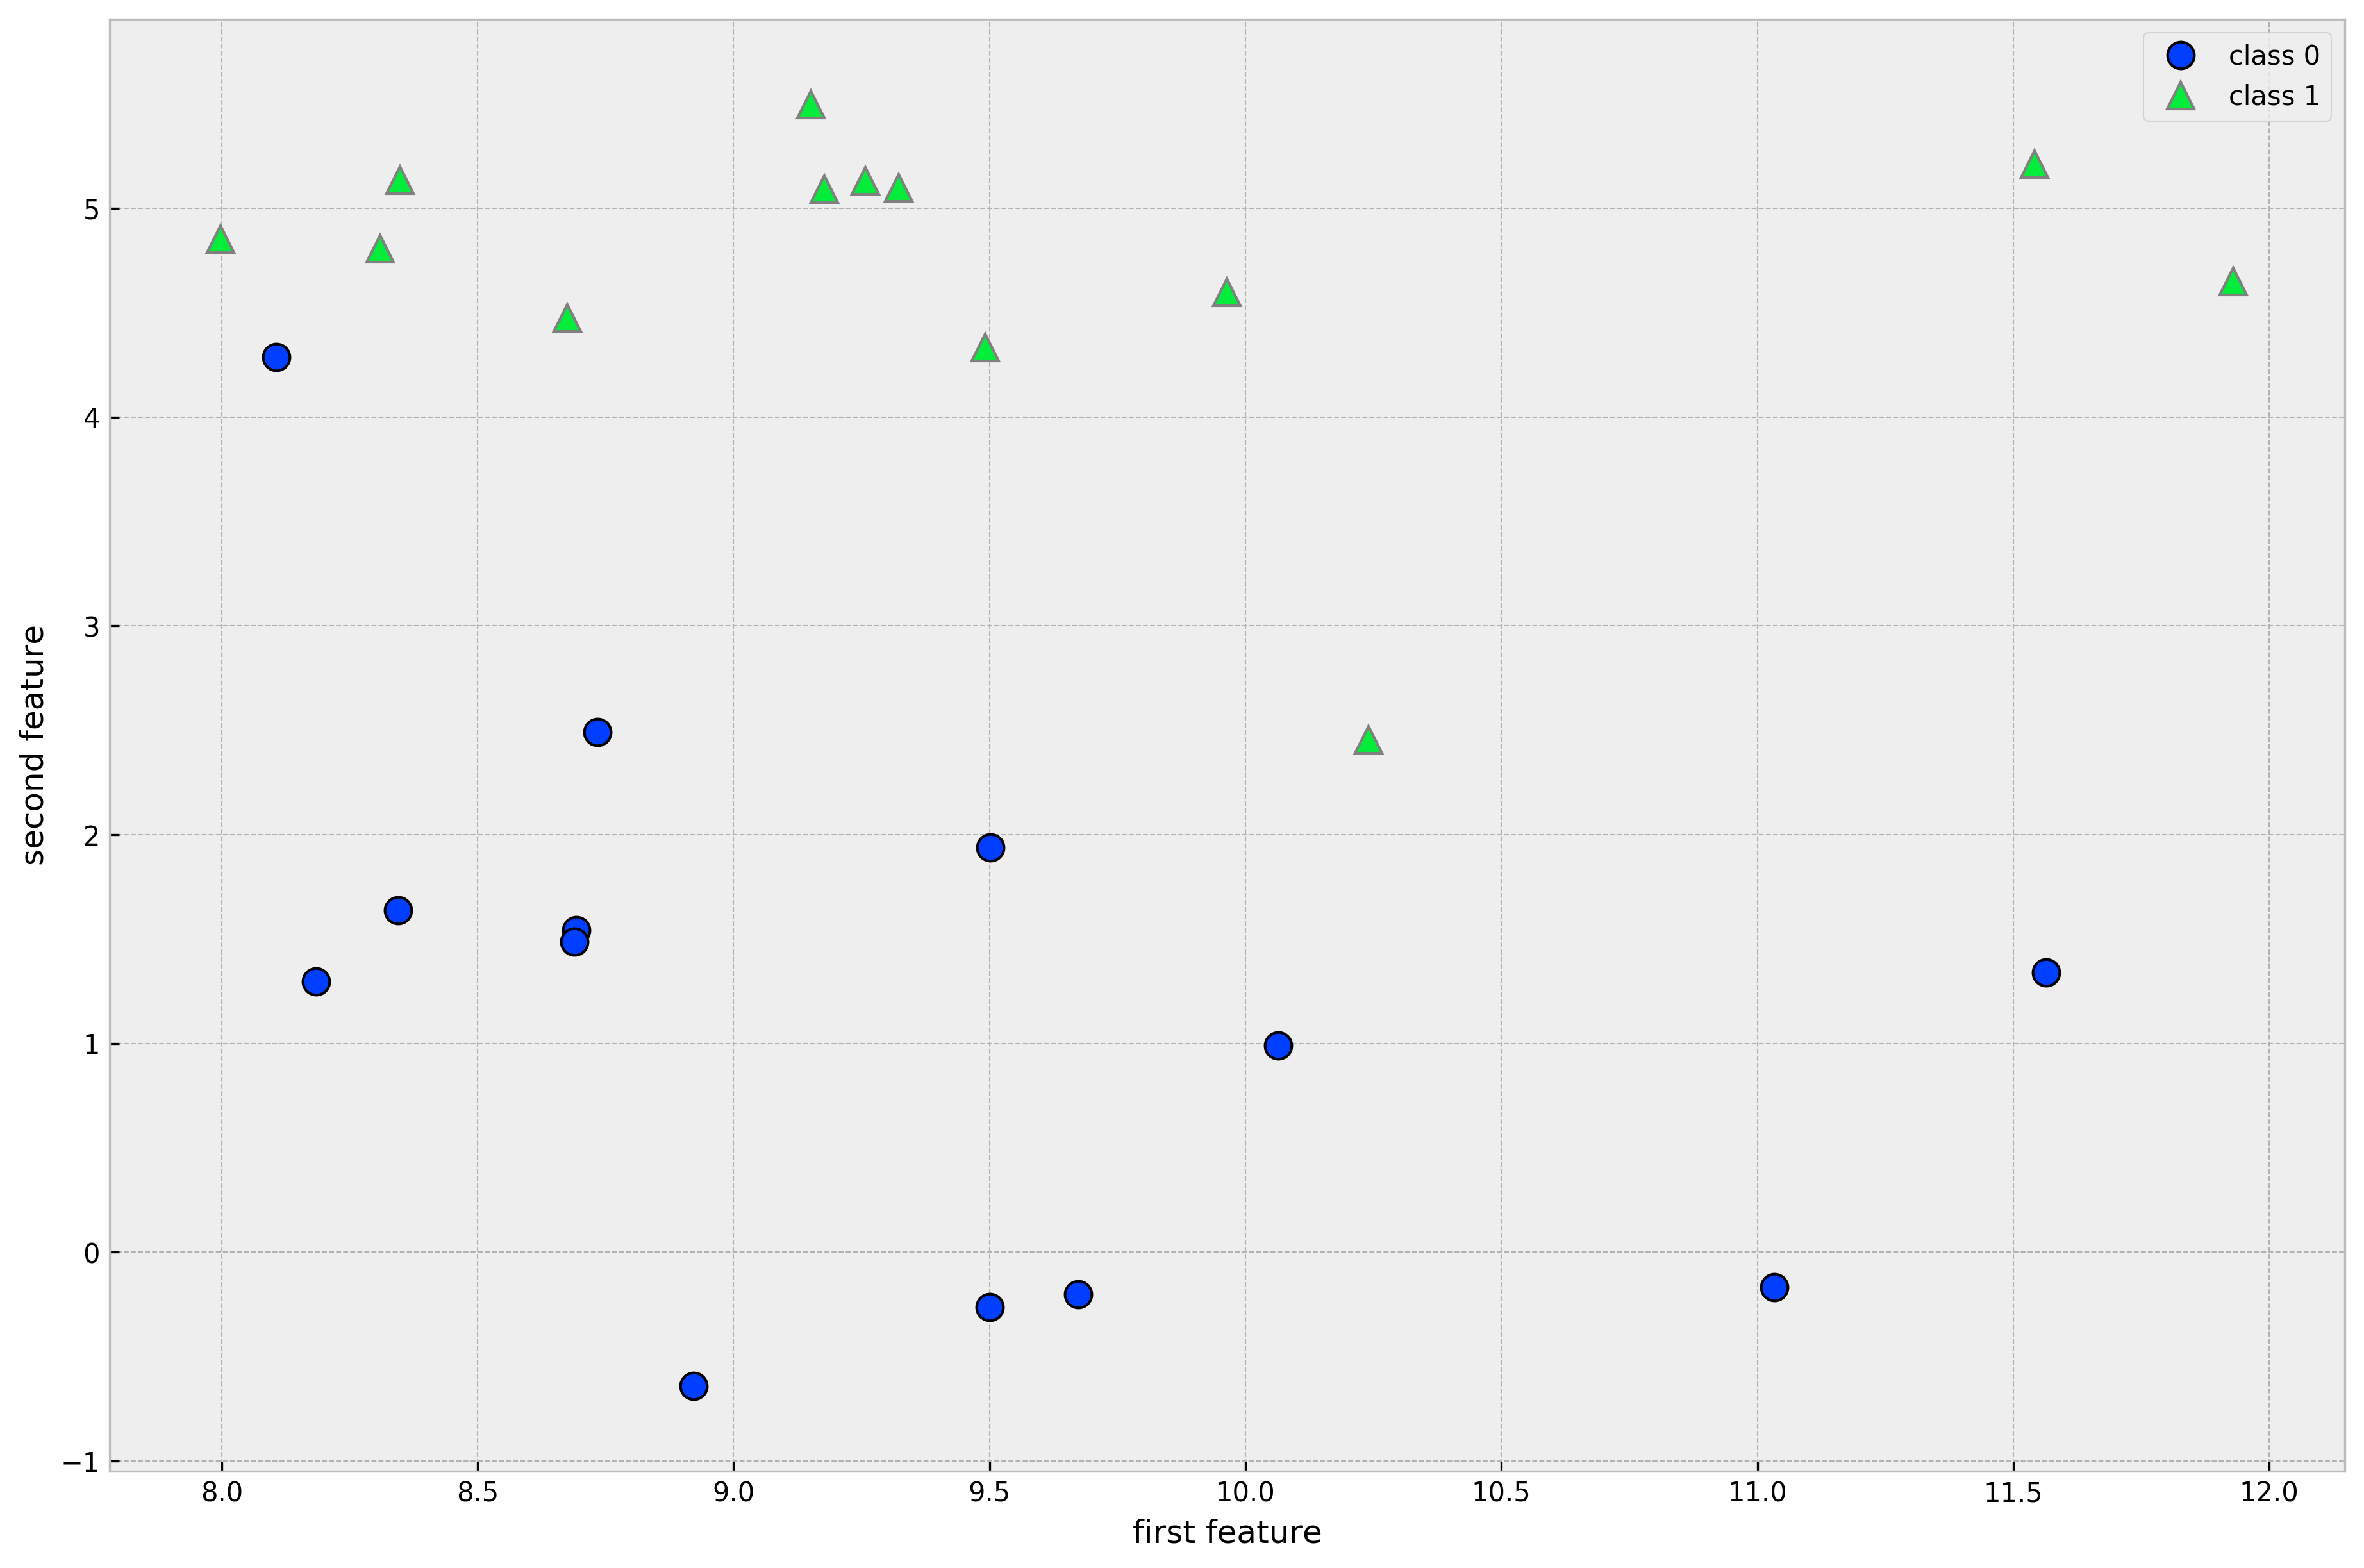

In [6]:
#generate samples
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0','class 1'], loc='best')
plt.xlabel('first feature')
plt.ylabel('second feature')
X.shape

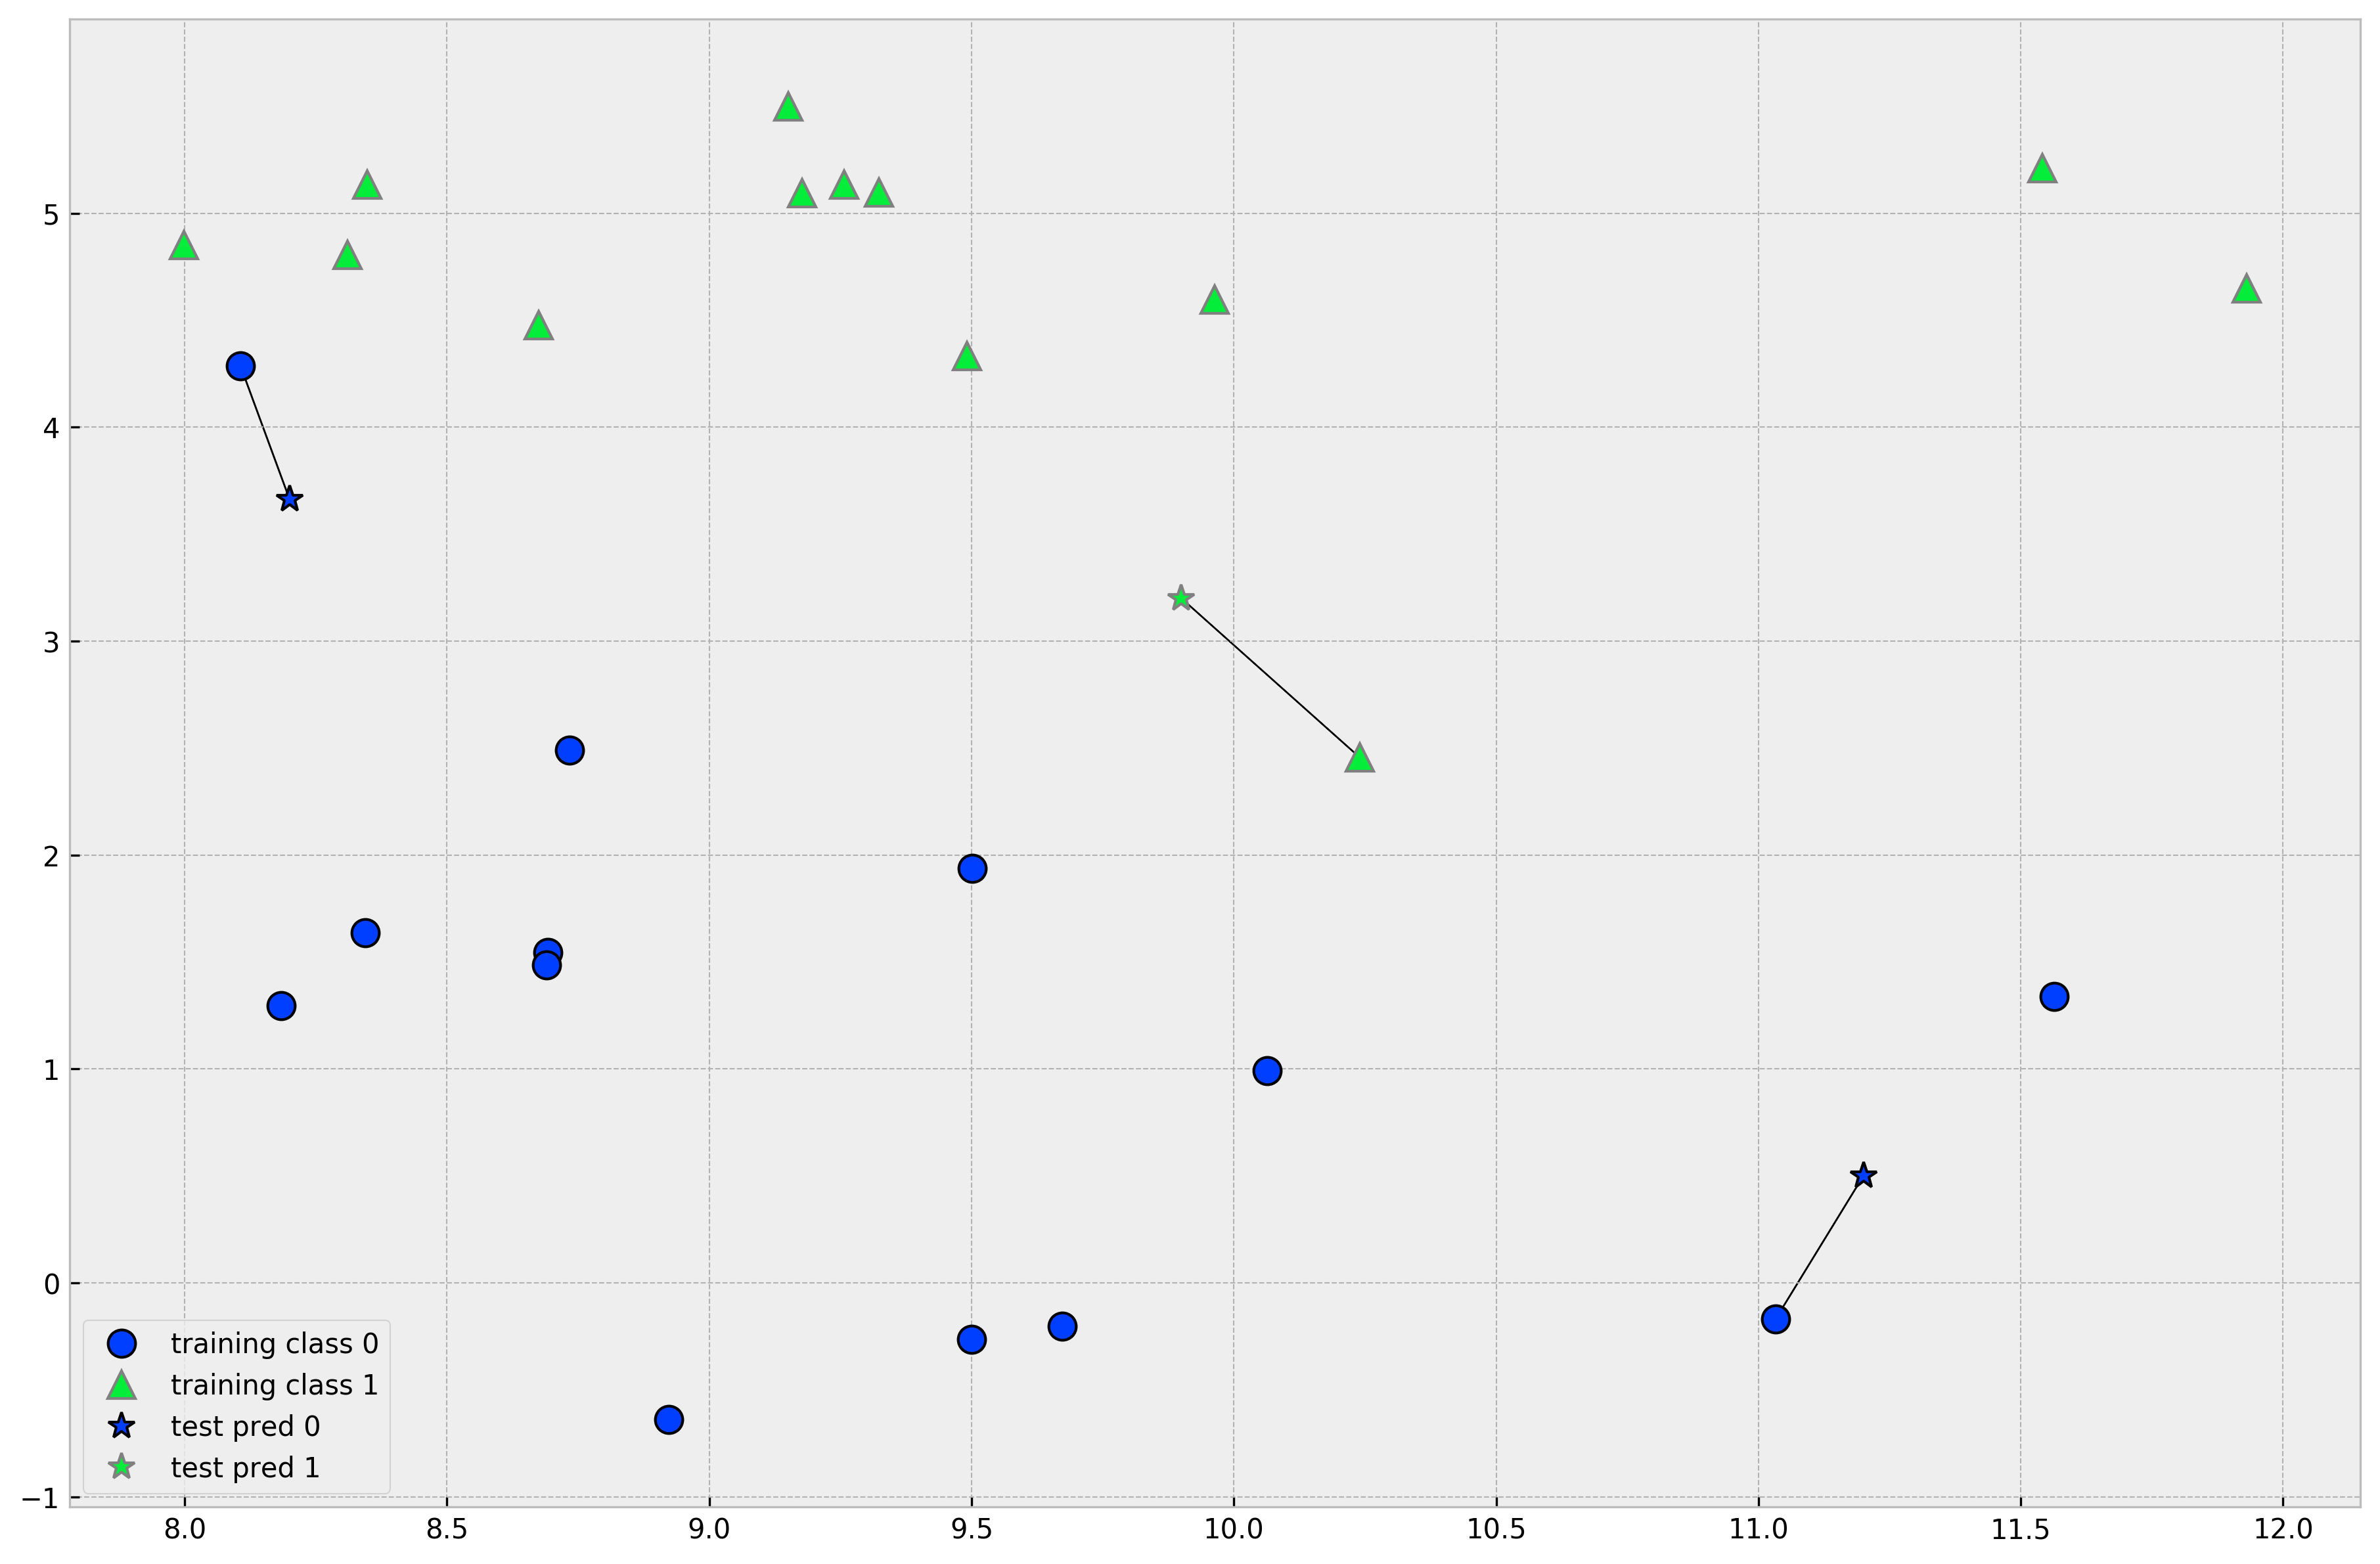

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

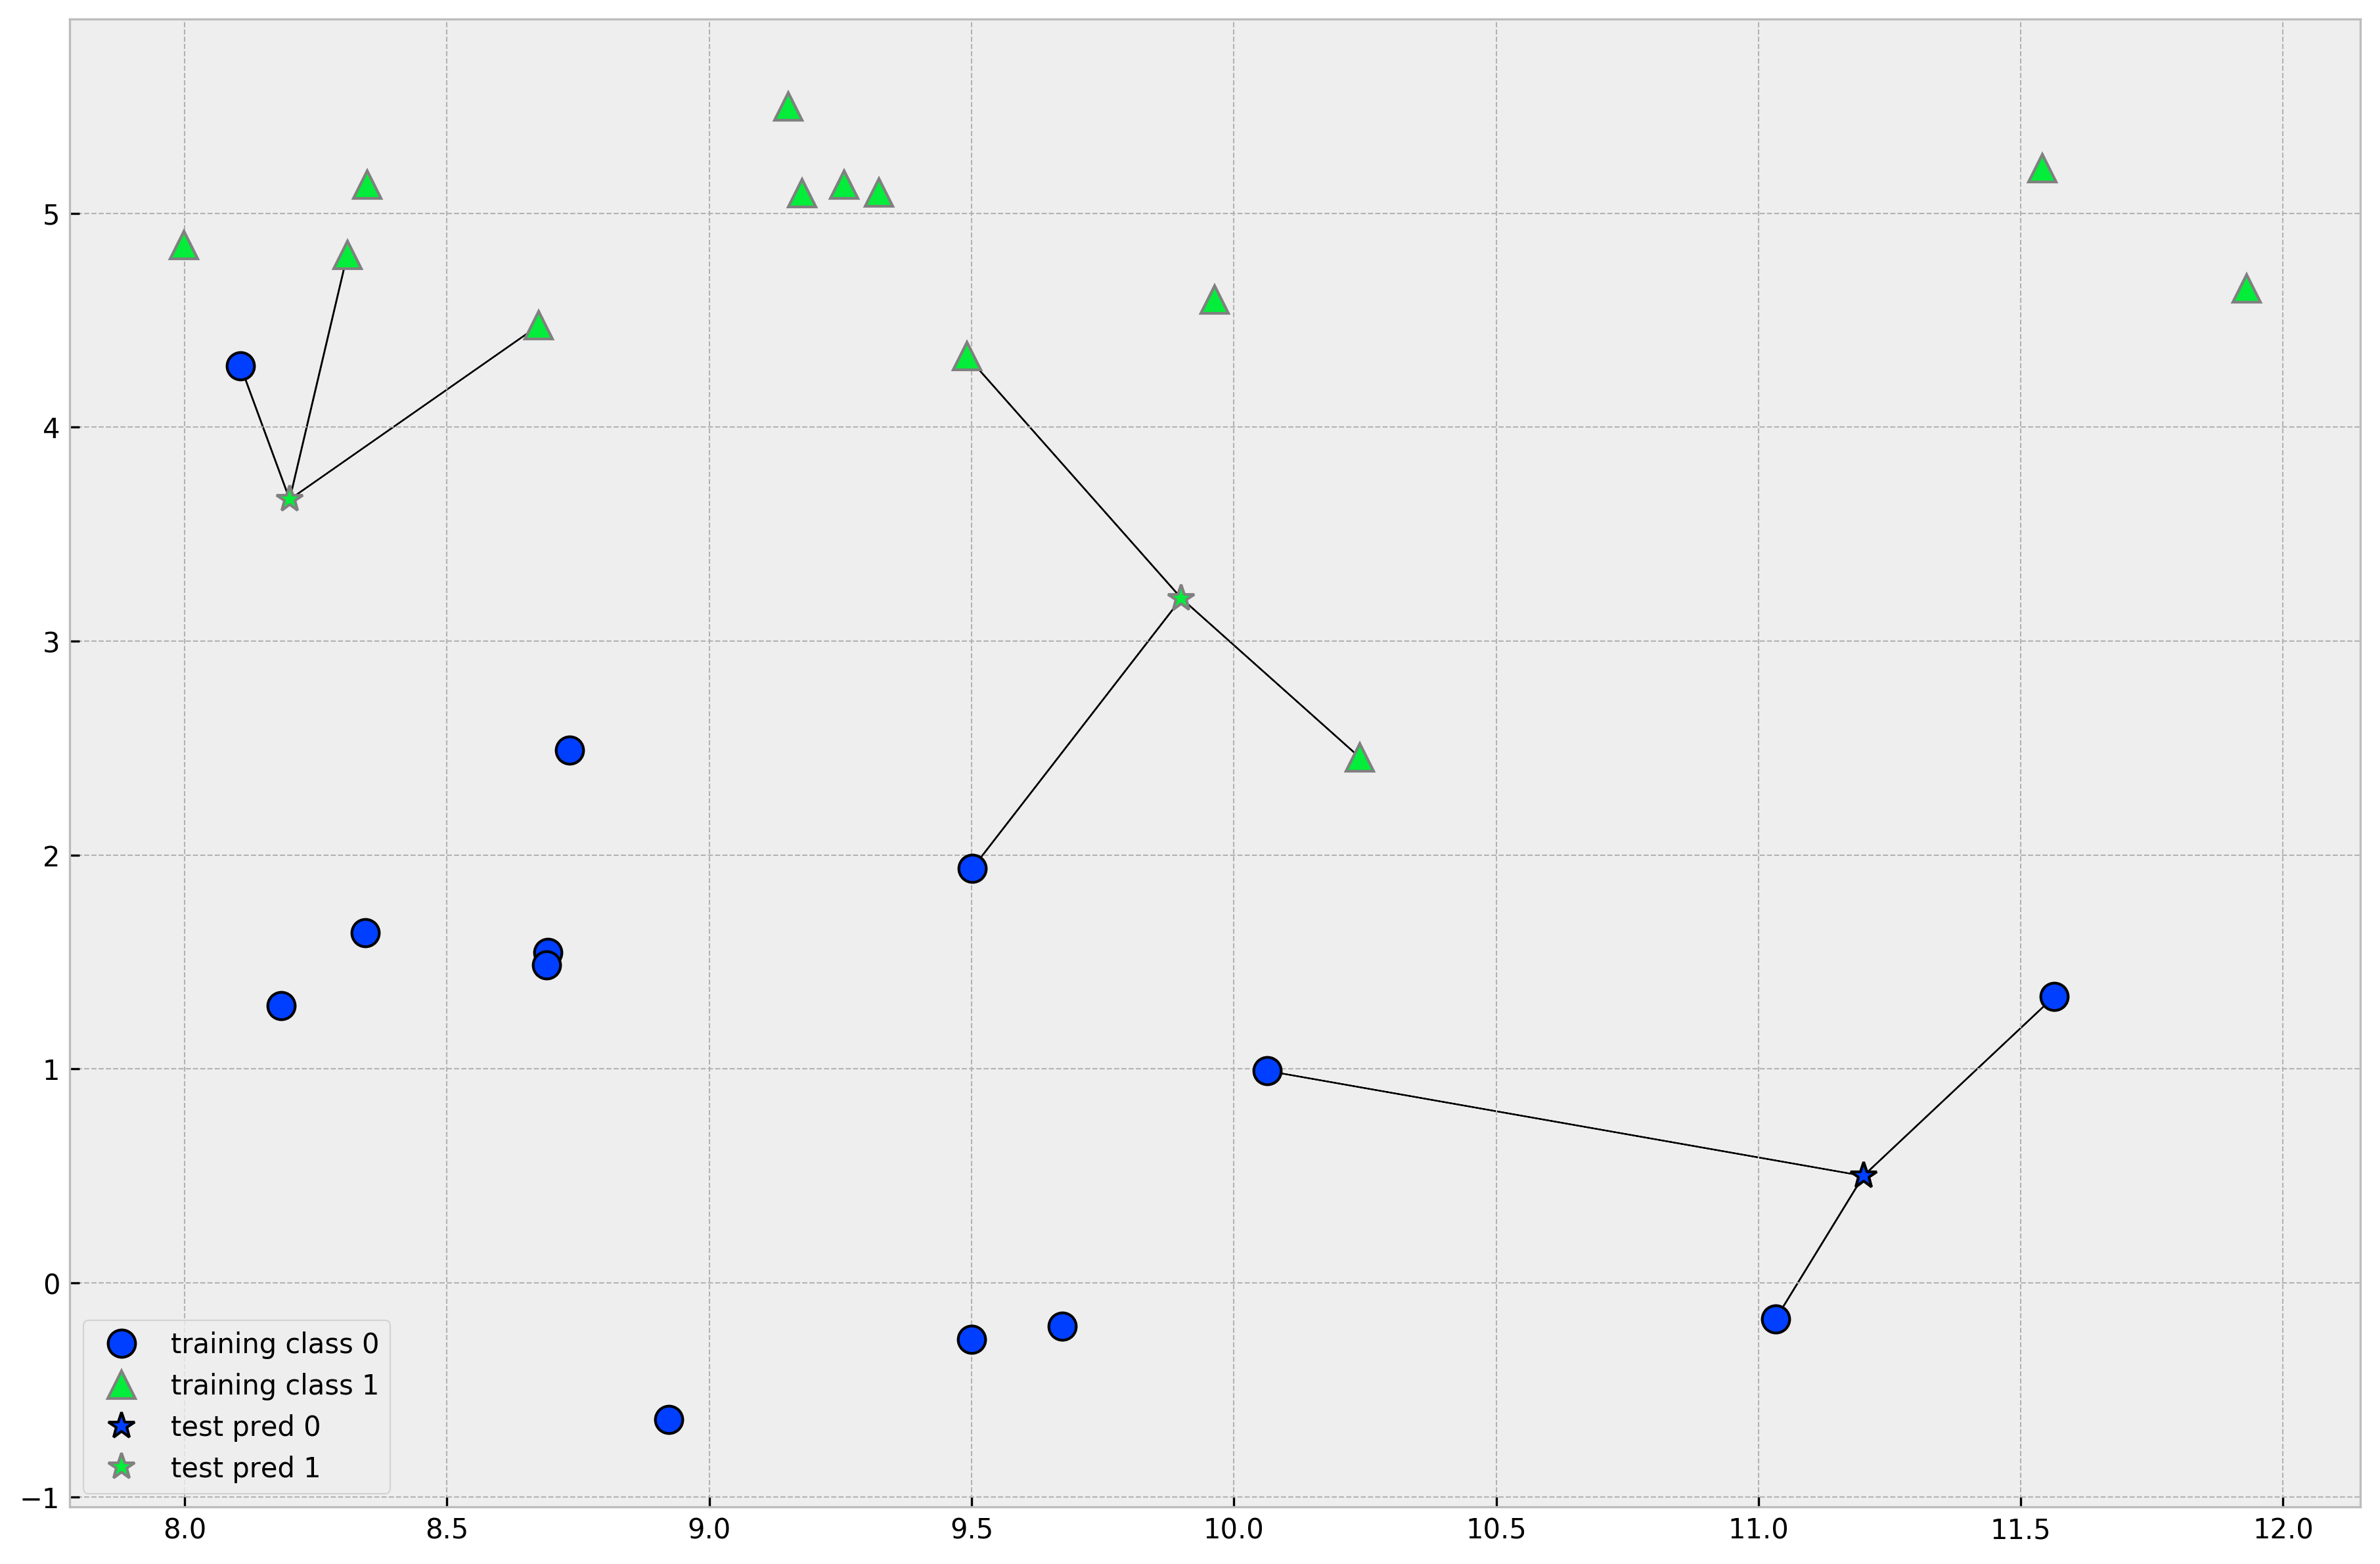

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

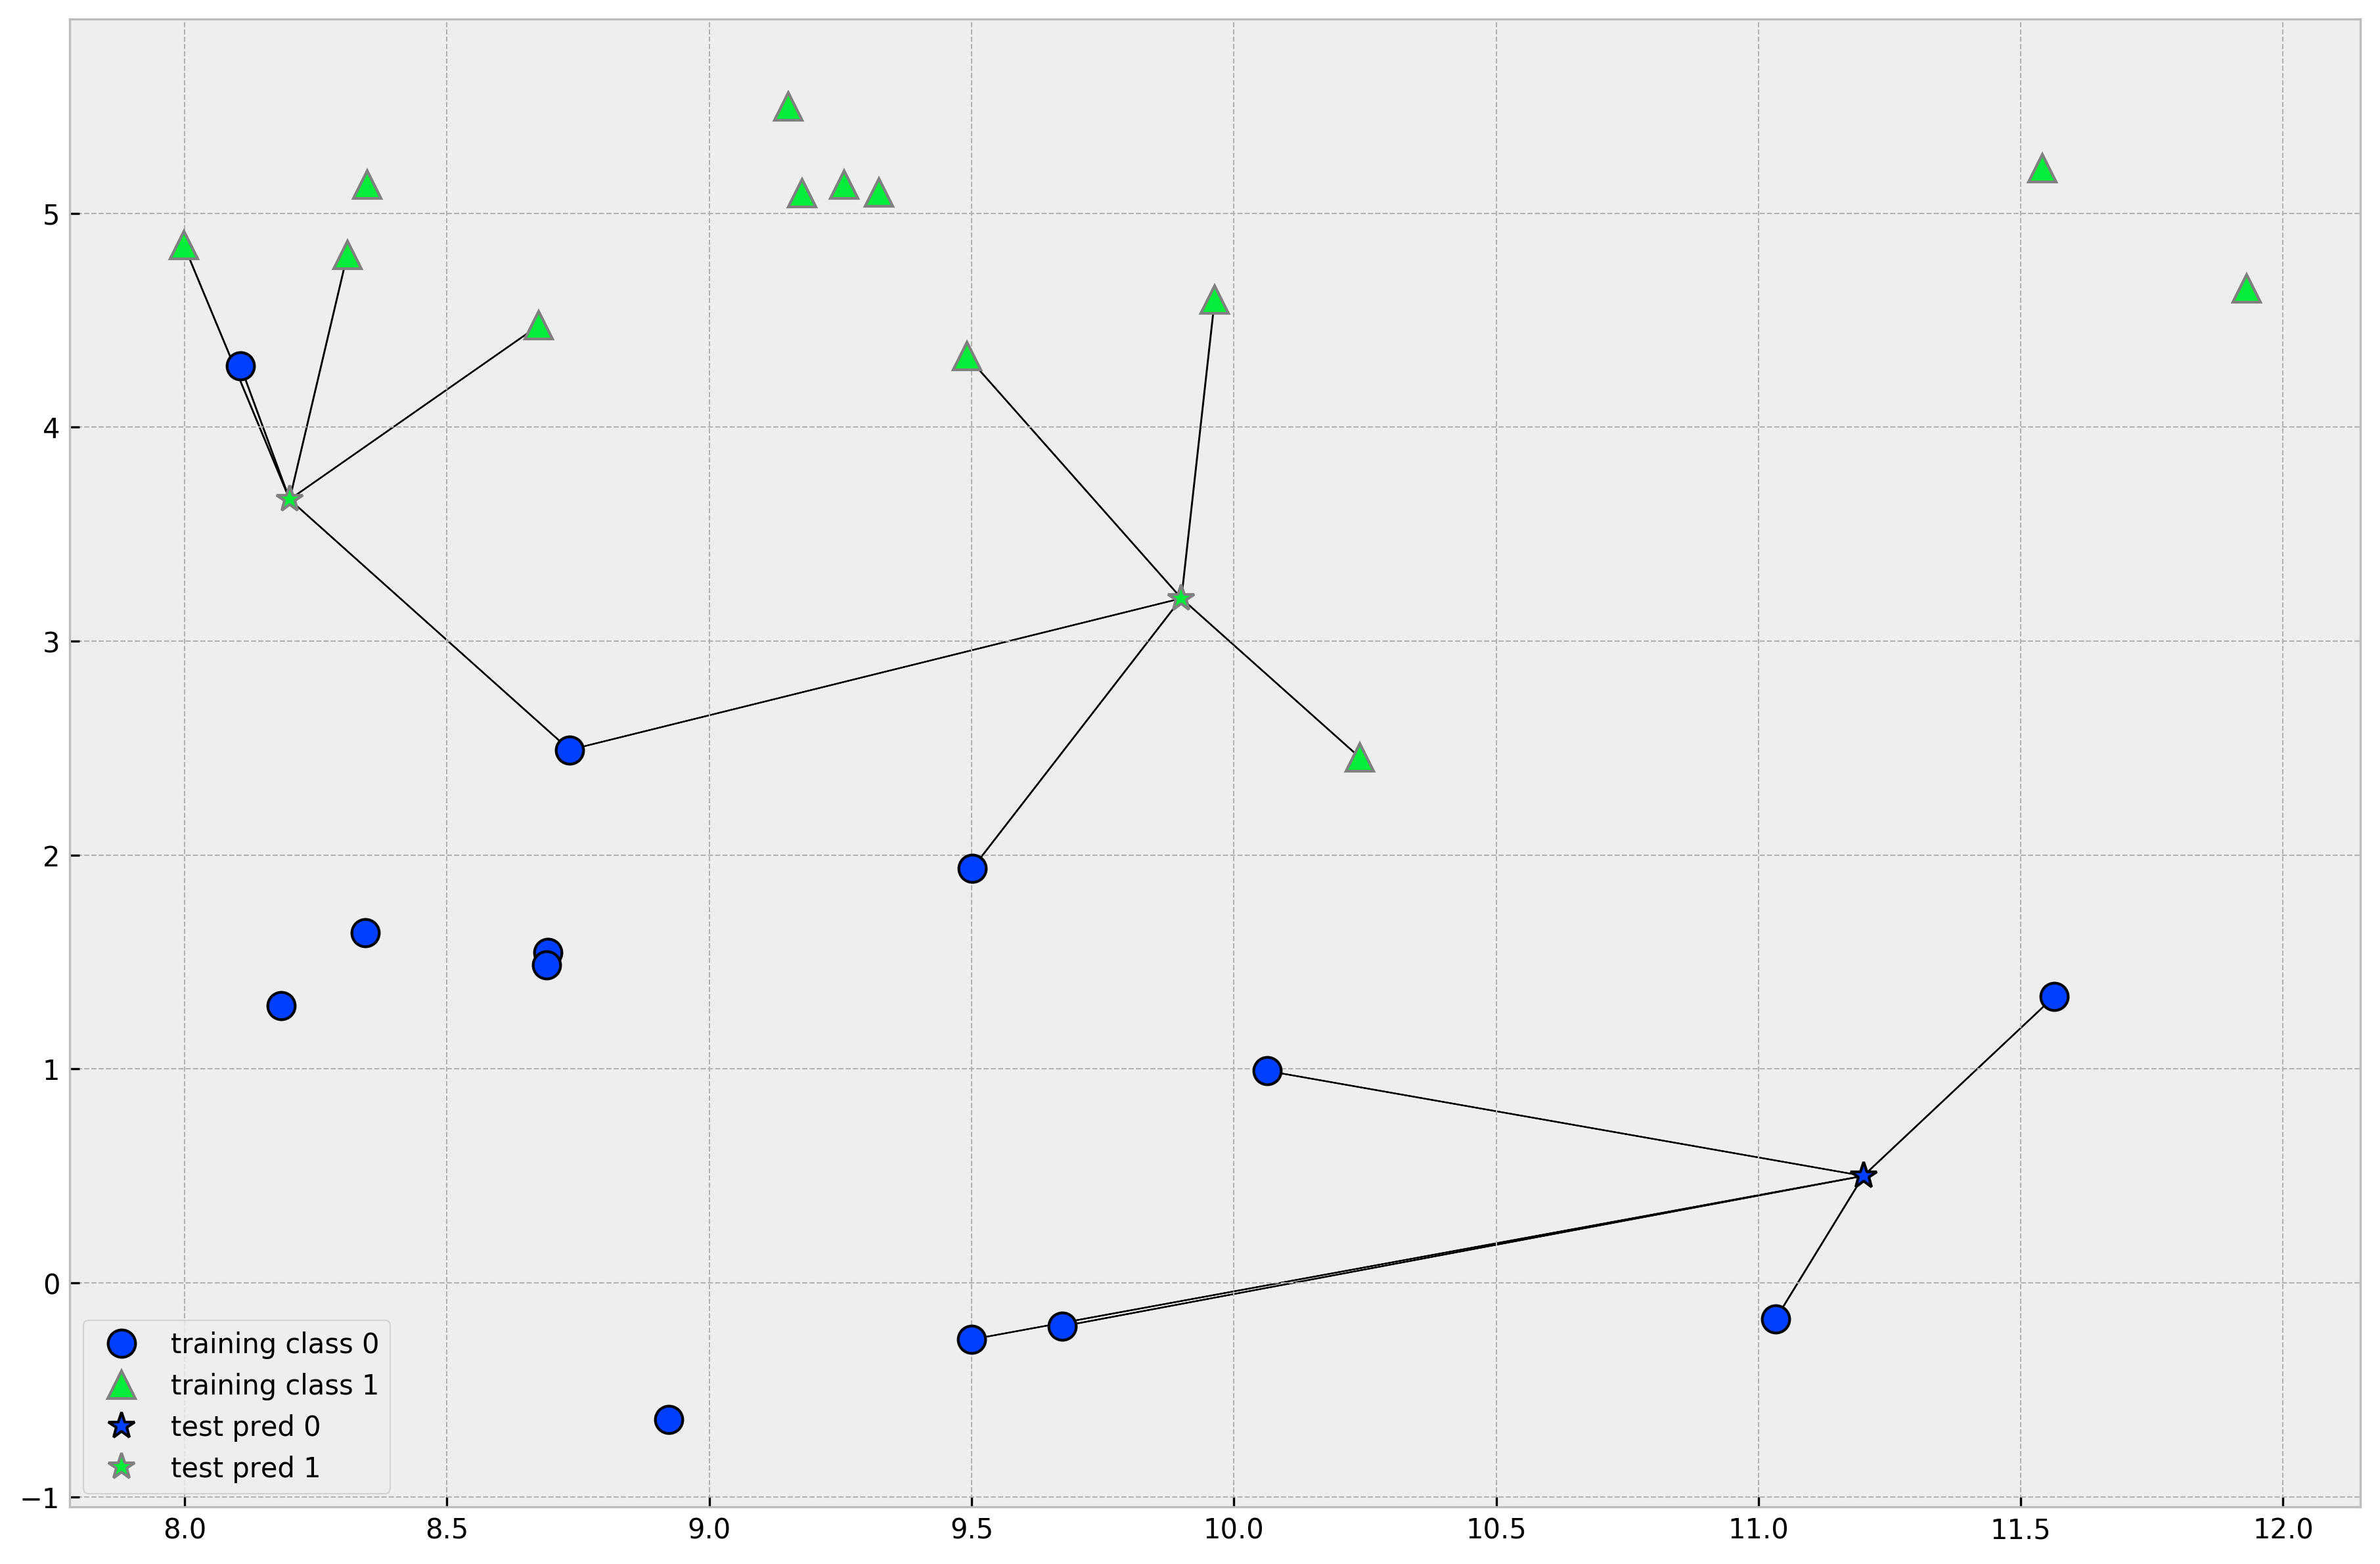

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

#### 线性分类演示

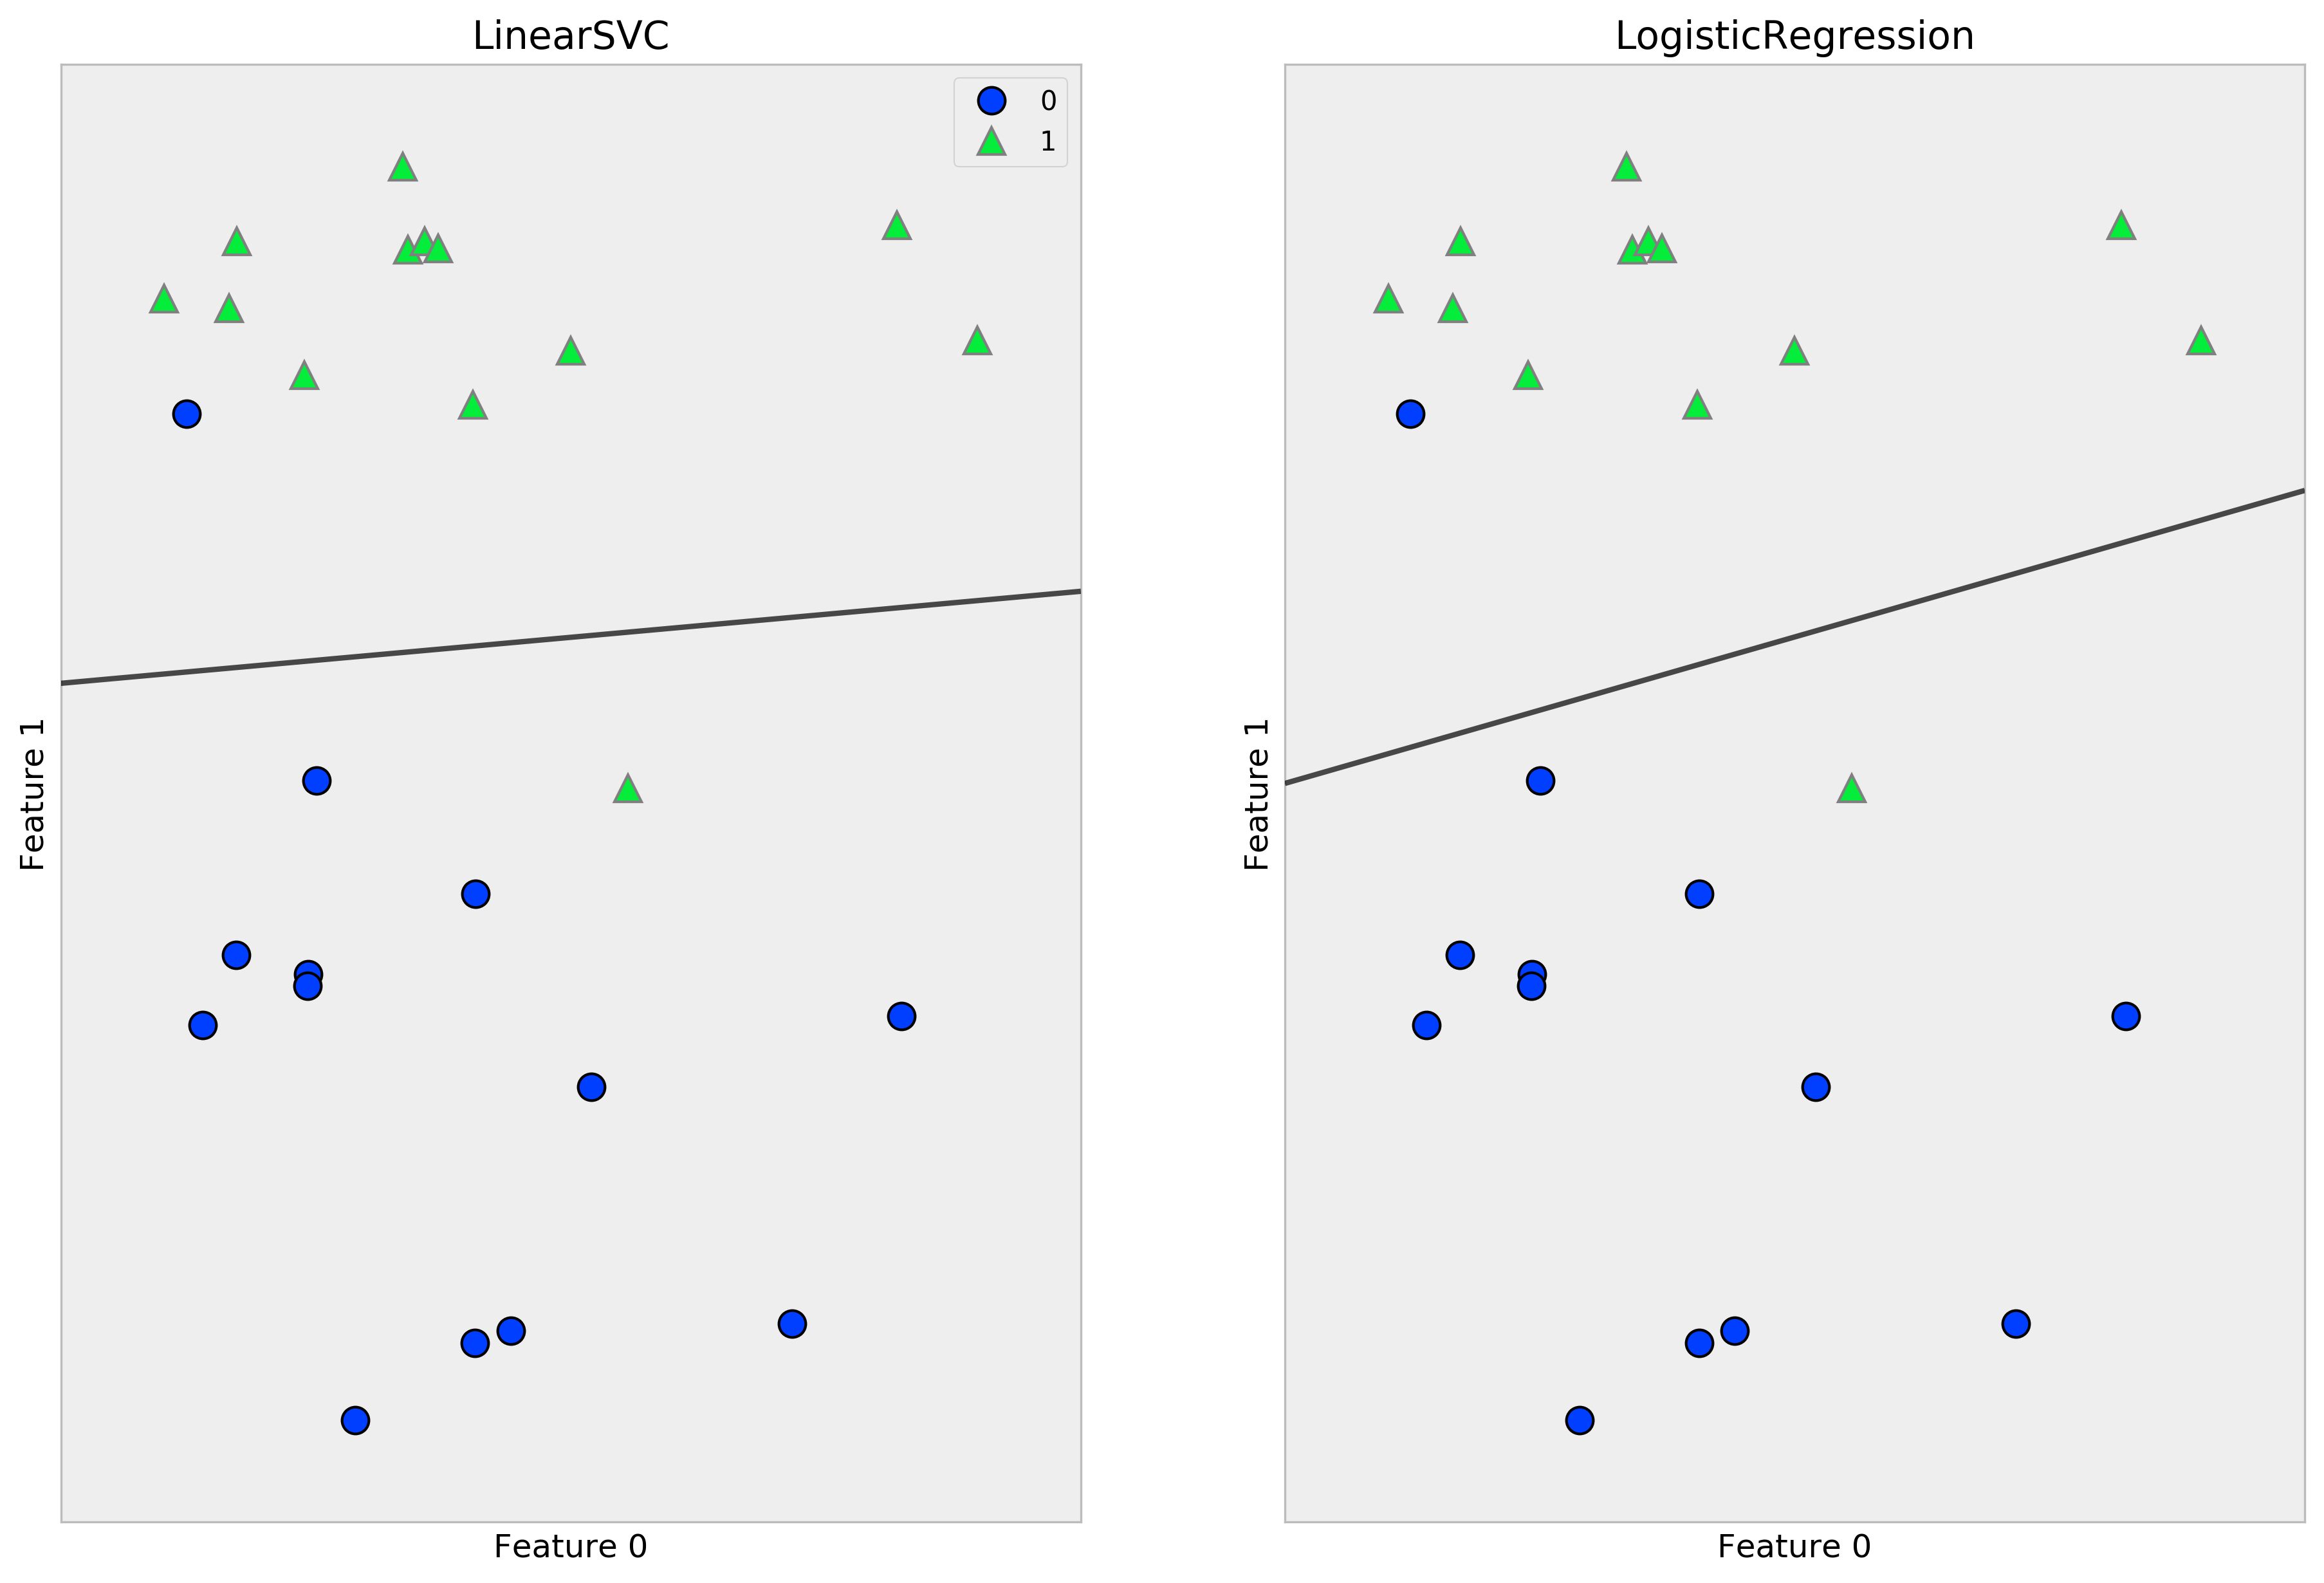

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

## 概率统计

#### 古典概率

古典概率通常又叫事前概率，是指当随机事件中各种可能发生的结果及其出现的次数都可以由演绎或外推法得知，而无需经过任何统计试验即可计算各种可能发生结果的概率。

关于古典概率是以这样的假设为基础的,即随机现象所能发生的事件是有限的、互不相容的,而且每个基本事件发生的可能性相等。
例如,抛掷一枚平正的硬币,正面朝上与反面朝上是唯一可能出现的两个基本事件,且互不相容。如果我们把出现正面的事件记为E,出现事件E的概率记为p(E),则:

$P(E)=1/(1+1)=1/2$

一般说来,如果在全部可能出现的基本事件范围内构成事件A的基本事件有a个,不构成事件A的事件有b个,则出现事件A的概率为:```

$P(A)=\large \frac{a}{a+b}$

#### 贝叶斯条件概率

条件概率是指事件A在另外一个事件B已经发生条件下的发生概率。
条件概率表示为：P（A|B），读作“在B的条件下A的概率”。若只有两个事件A，B，那么，
$P(A\vert B)=\large \frac{P(AB)}{P(B)}\\
P(AB)=P(A)P(B\vert A)$

[例子讲解](https://www.jianshu.com/p/d9757860c4f8)

#### 高斯分布 与 [大数定律](https://zh.wikipedia.org/wiki/%E5%A4%A7%E6%95%B0%E5%AE%9A%E5%BE%8B)

>大数定律
人们发现，在重复试验中，随着试验次数的增加，事件发生的频率趋于一个稳定值；人们同时也发现，在对物理量的测量实践中，测定值的算术平均也具有稳定性。比如，我们向上抛一枚硬币，硬币落下后哪一面朝上是偶然的，但当我们上抛硬币的次数足够多后，达到上万次甚至几十万几百万次以后，我们就会发现，硬币每一面向上的次数约占总次数的二分之一，亦即偶然之中包含着必然。

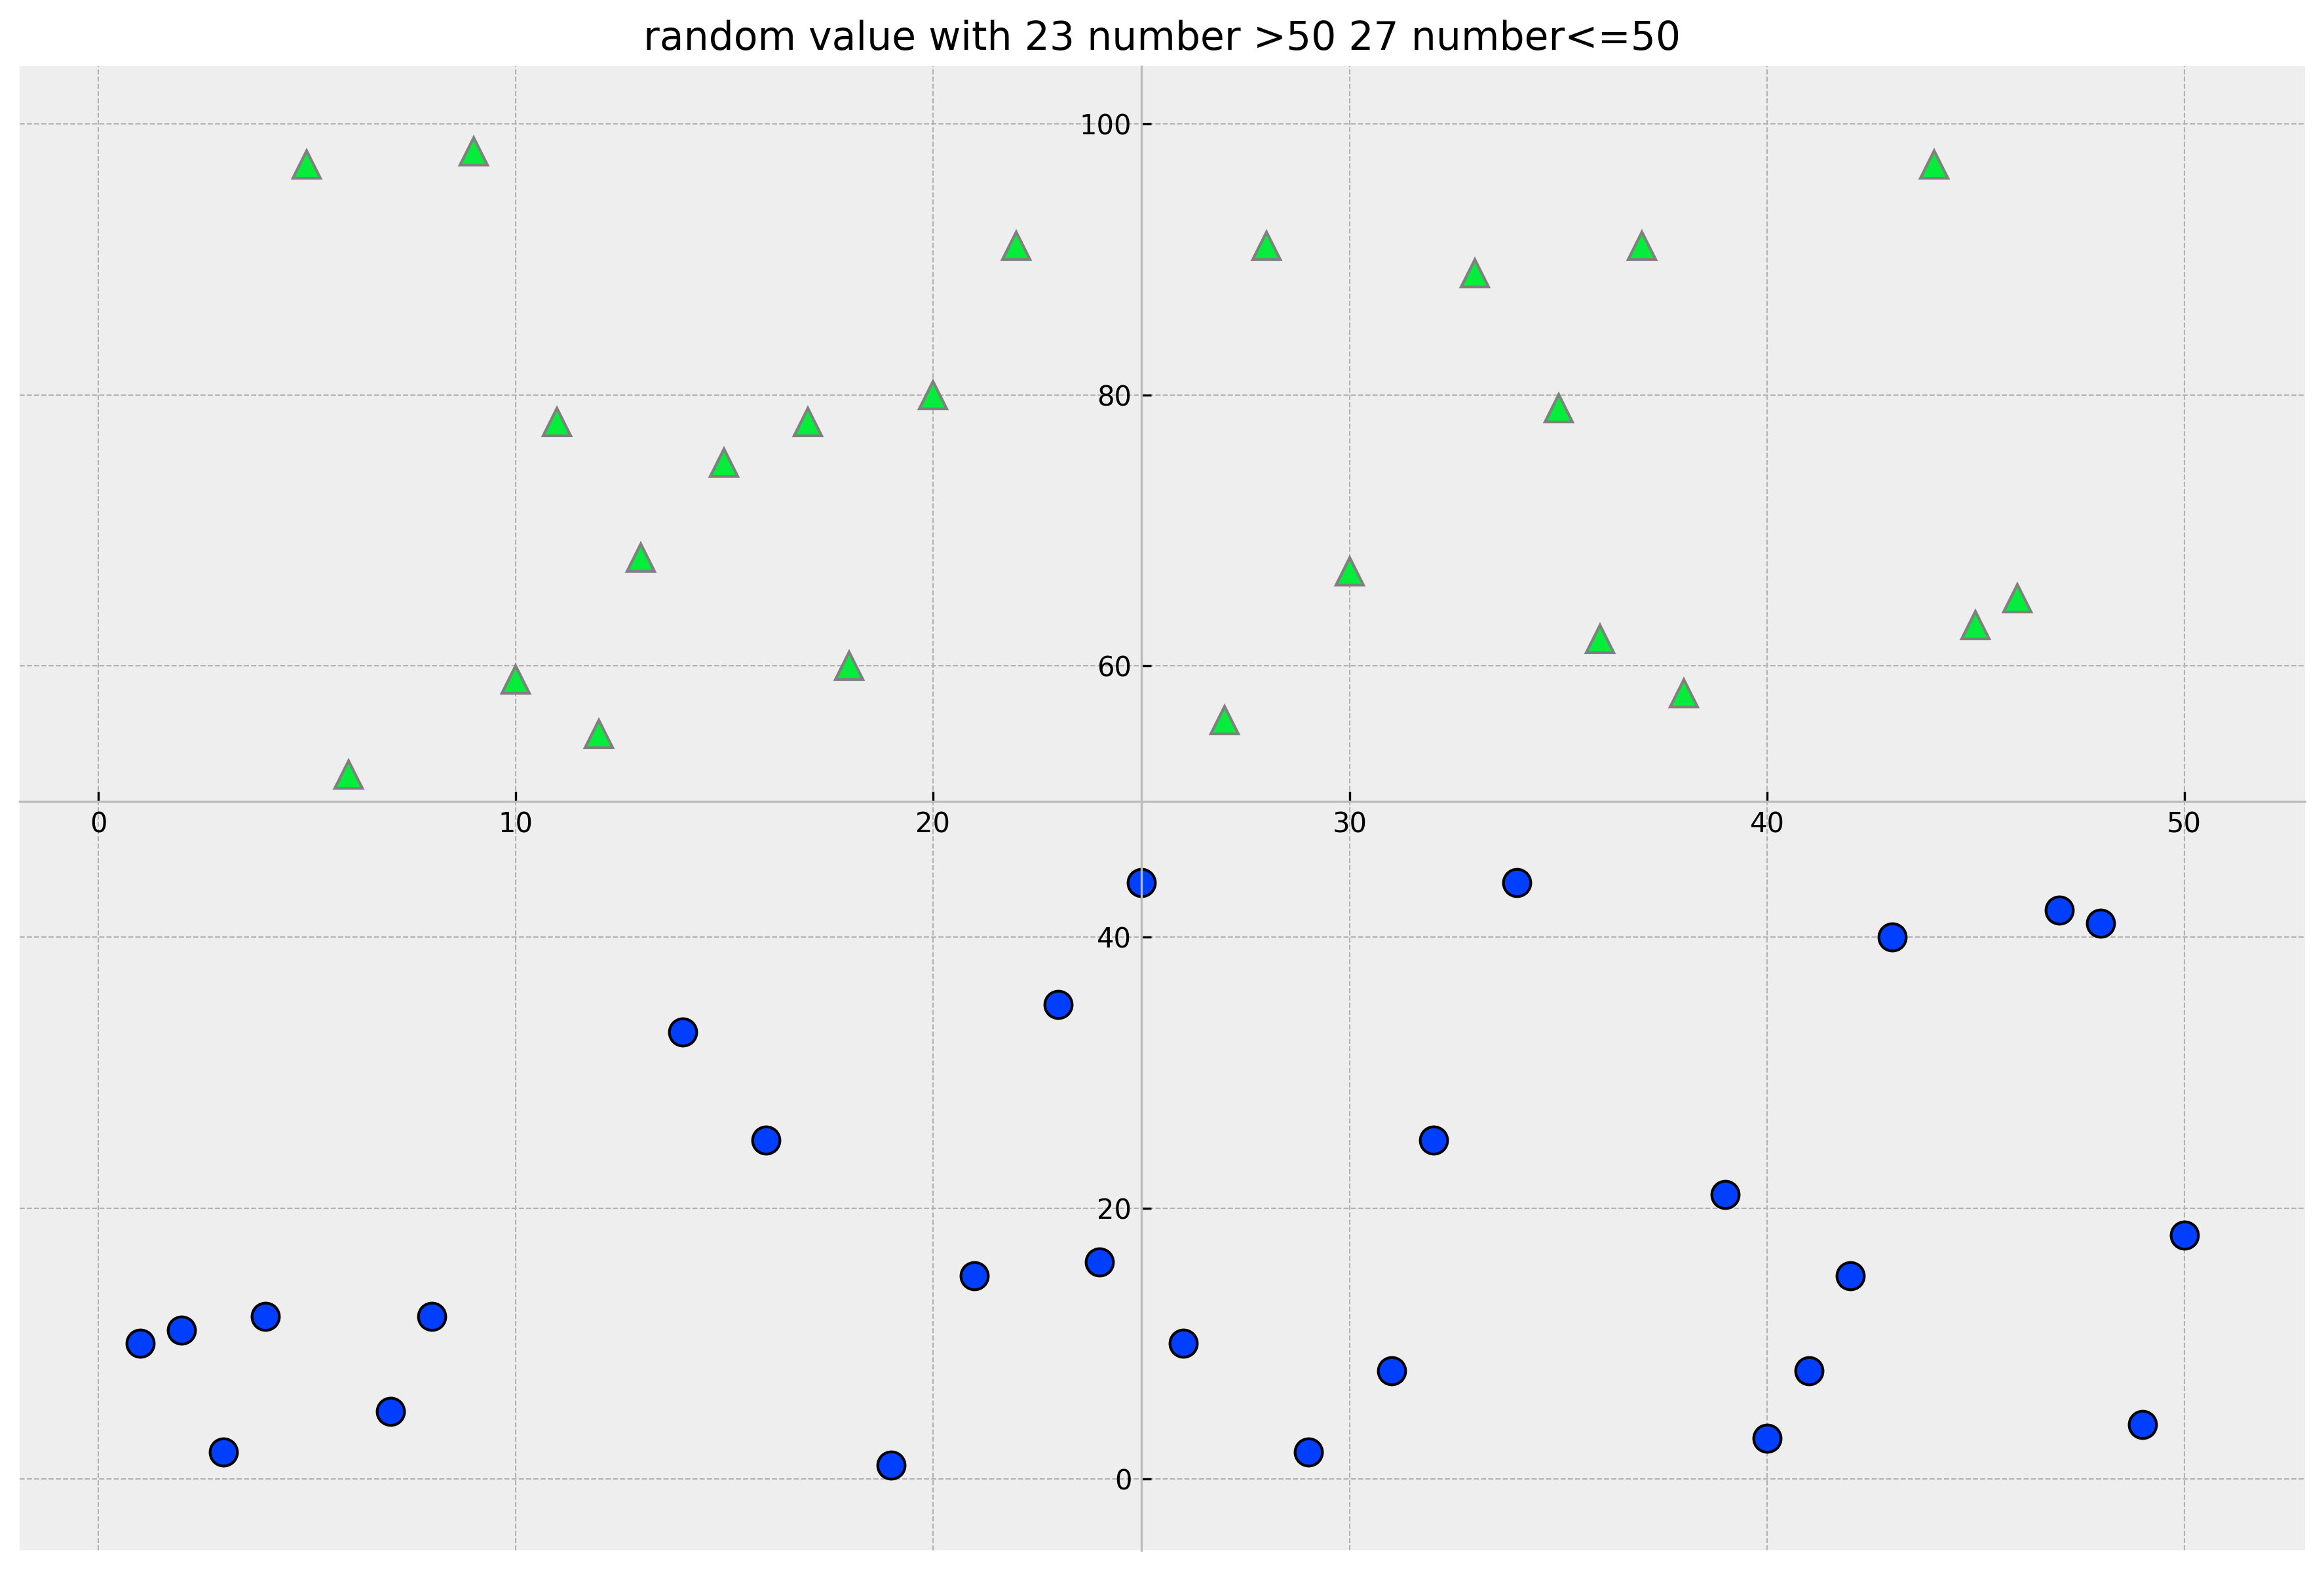

In [11]:
y=np.random.randint(1,101,50)
x=np.arange(1,51,1)
ax=plt.gca()
ax.spines['bottom'].set_position(("data",50))
ax.spines['left'].set_position(('data',25))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.xlabel('count')
# plt.ylabel('random value')
z=y>50
y_a=np.sum(z>0)
y_b=50-y_a
plt.title('random value with %d number >50 %d number<=50'%(y_a,y_b))
# plt.scatter(x,y,s=100,c='r')
mglearn.discrete_scatter(x,y,z)

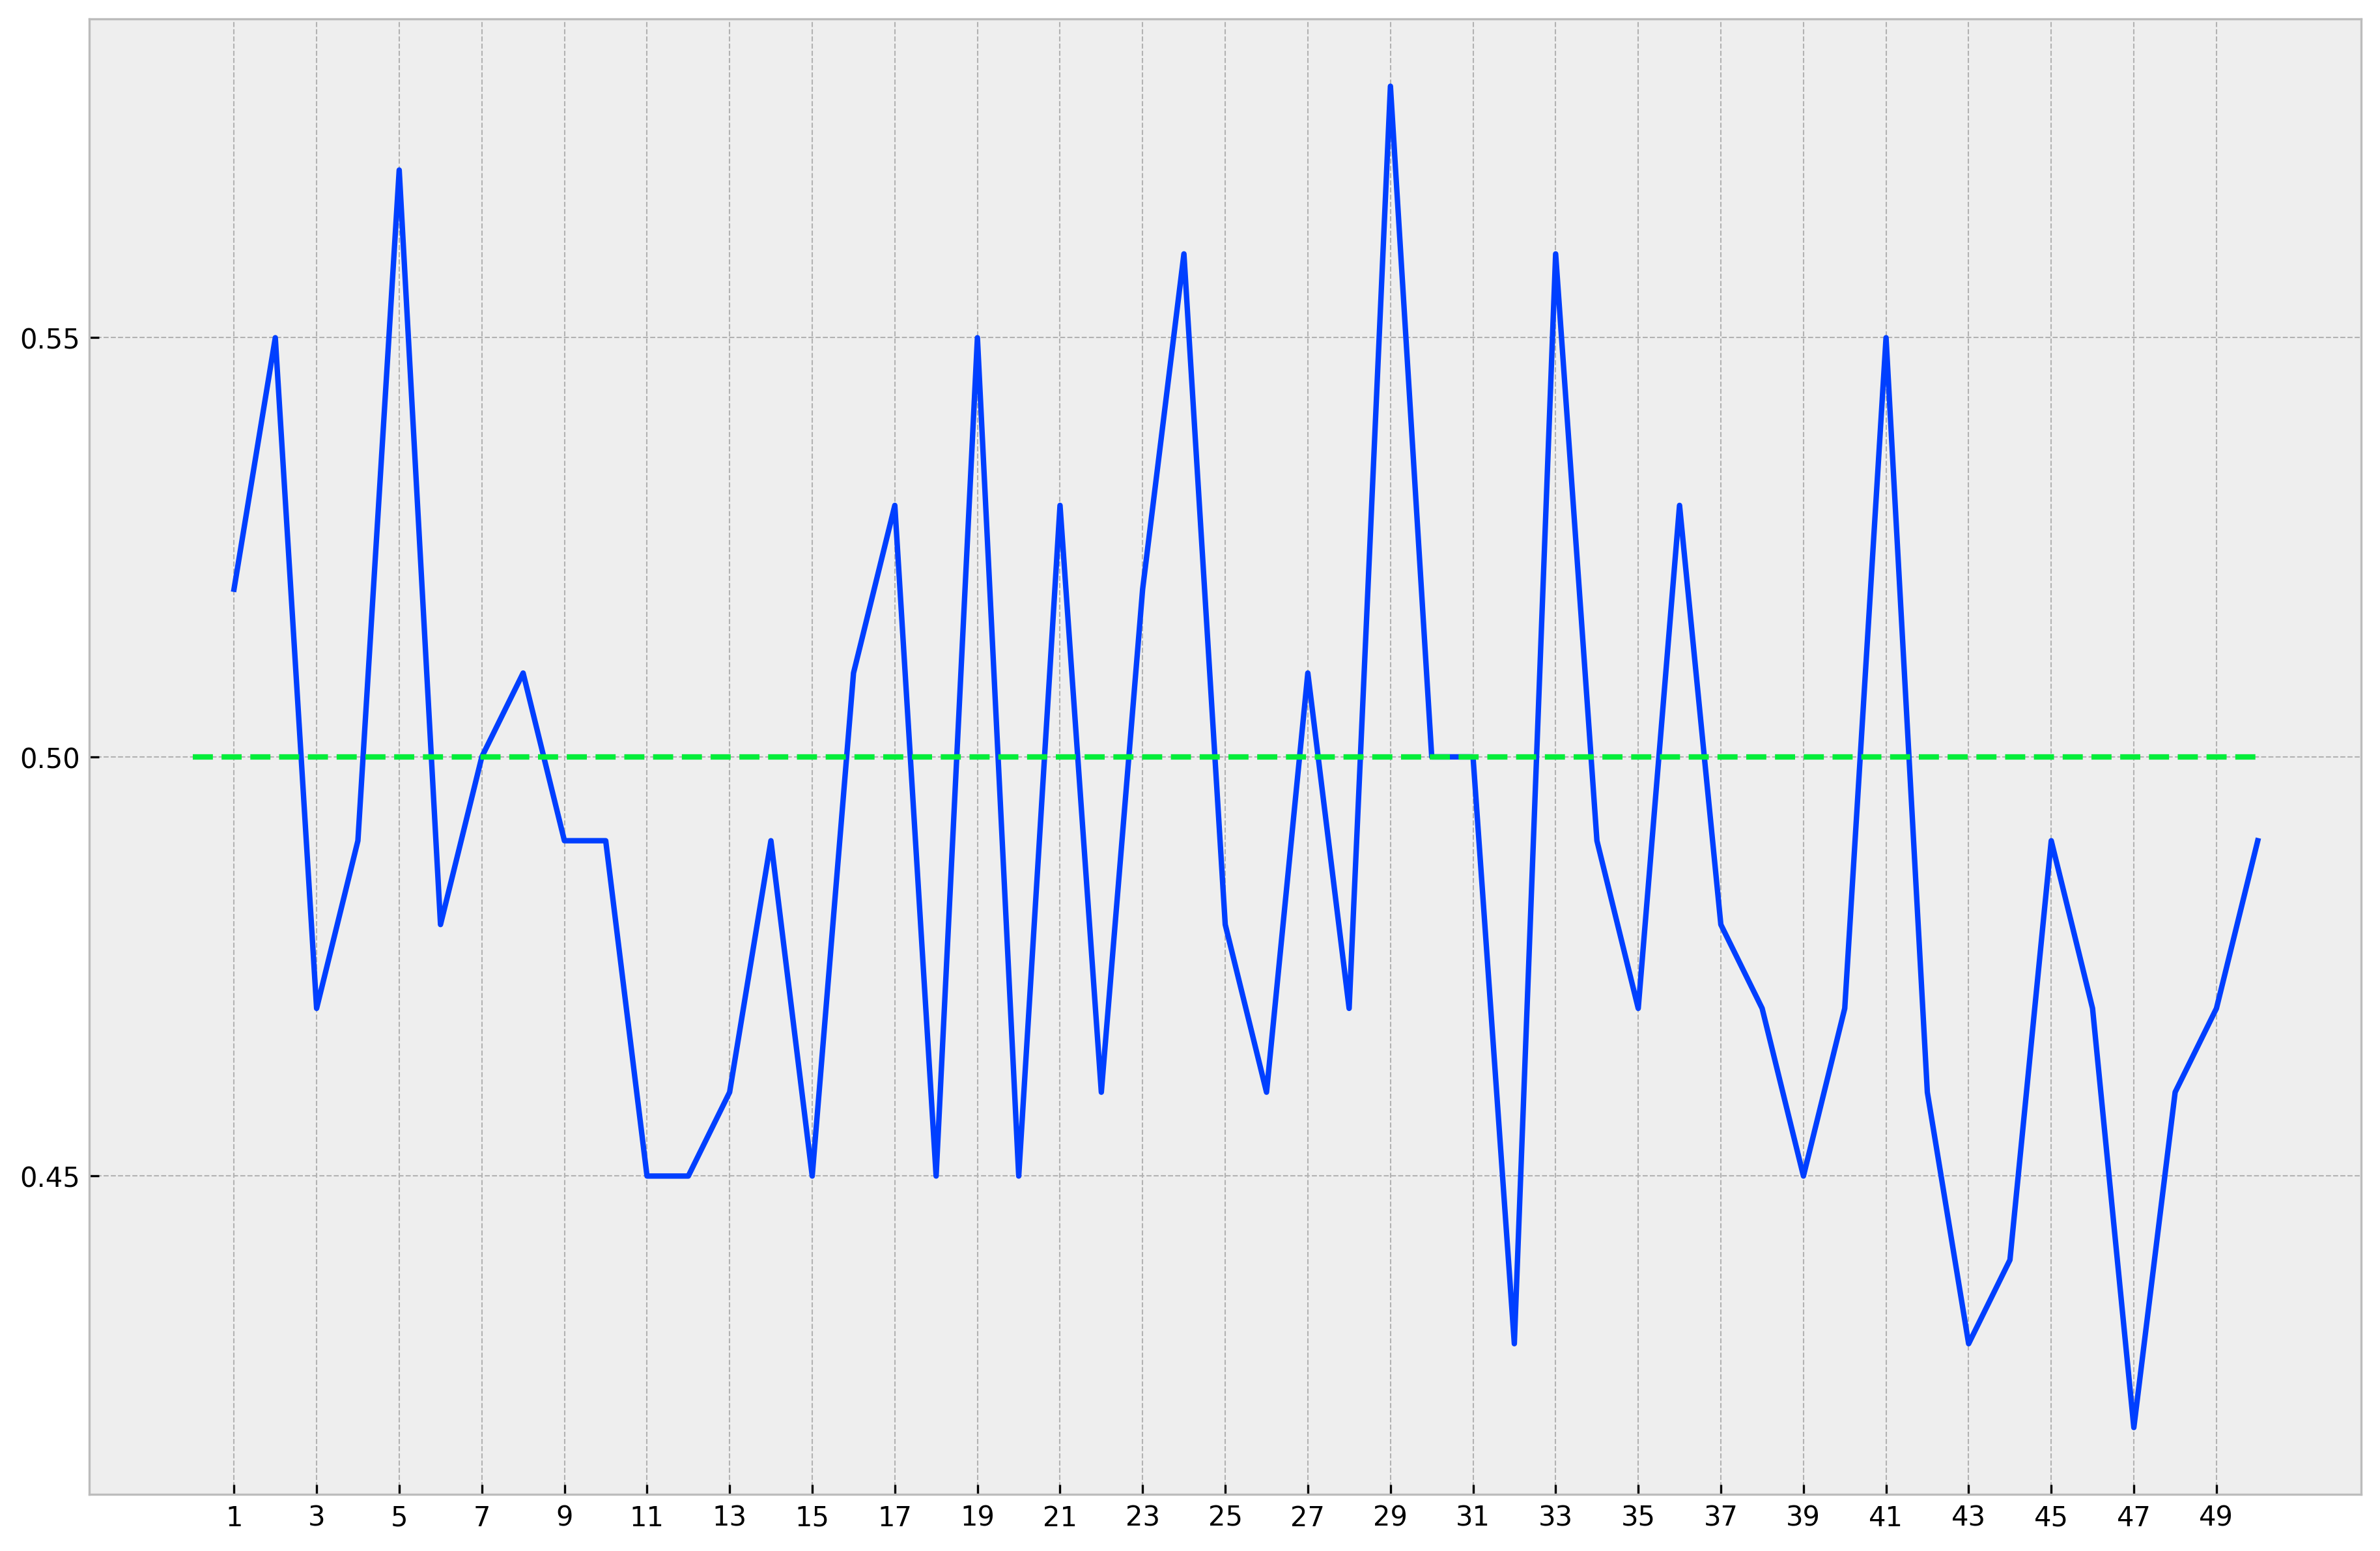

In [12]:
l=[]
for _ in range(1,51):
    Y=np.random.randint(1,101,100)
    l.append(np.sum(Y>50)/100)
plt.plot(np.arange(1,51),l)
plt.xticks(np.arange(1,51,2))
plt.yticks(np.arange(0.4,0.6,0.05))
plt.plot([0,50],[0.5,0.5],linestyle='--')

$\large f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-u)^2}{2\sigma^2}}$

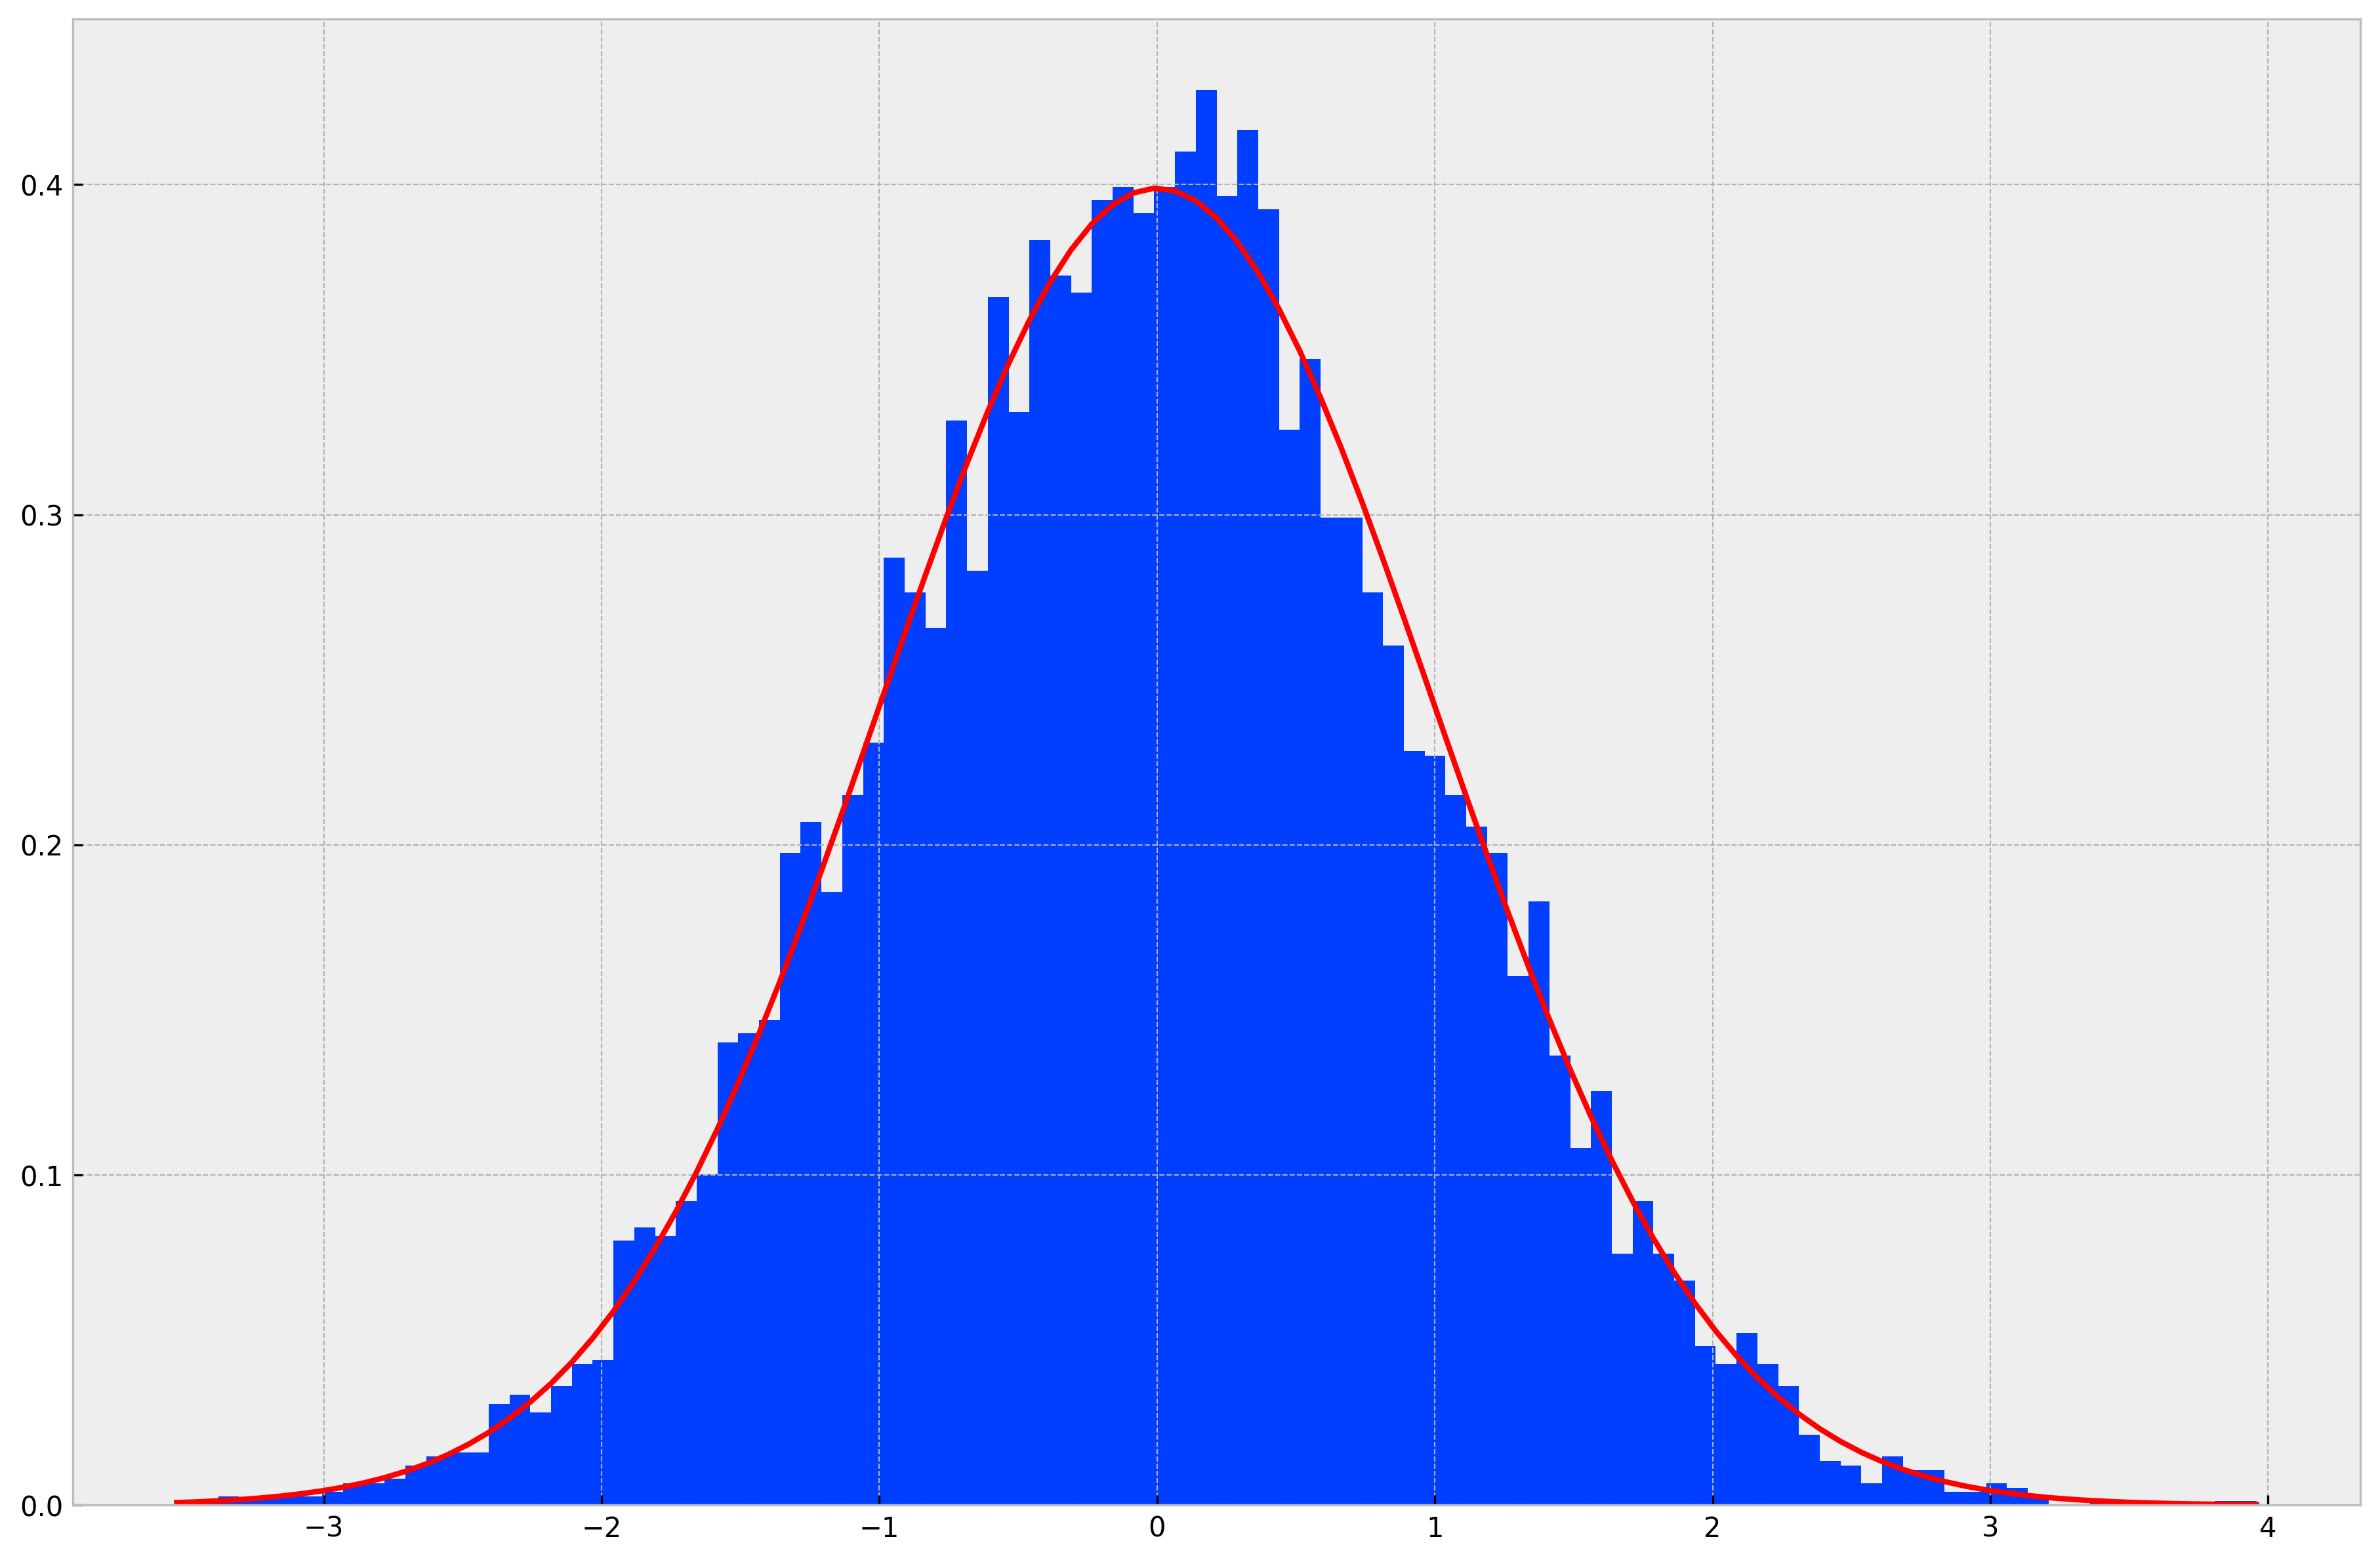

In [13]:
mu=0
sigma=1
sample=10000
data=np.random.normal(mu,sigma,sample)
bincount=100
count, bins, _ =plt.hist(data,bins=bincount,normed=True)
        # normed是进行拟合的关键
        # count统计某一bin出现的次数，在Normed为True时，可能其值会略有不同
plt.plot(bins, 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-(bins-mu)**2/(2*sigma**2)), lw=2, c='r')


[阮一峰正态分布](http://www.ruanyifeng.com/blog/2017/08/normal-distribution.html)

## 线性代数

#### 数组与矩阵

$\left\lgroup \matrix{a & b & c\cr d & e & f\cr h & i& j} \right\rgroup$

In [14]:
from sklearn.datasets import load_iris
bunch = load_iris()

In [15]:
df=pd.DataFrame(data=bunch.data,columns=bunch.feature_names)

In [16]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [17]:
all=pd.concat([df,pd.DataFrame(data=bunch.target,columns=['target'])],axis=1)

In [18]:
all.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [36]:
bunch.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [19]:
n=np.random.randn(5,2)

In [20]:
n

array([[-0.16472783,  0.2016716 ],
       [ 0.47532062,  0.09112161],
       [ 1.39552718, -0.07241583],
       [ 0.50737005,  2.74248744],
       [ 0.49282561,  0.96468086]])

In [21]:
n.shape

(5, 2)

In [22]:
type(n)

numpy.ndarray

#### [SVD概述](https://zh.wikipedia.org/wiki/%E5%A5%87%E5%BC%82%E5%80%BC%E5%88%86%E8%A7%A3)

奇异值分解是线性代数的集大成者，能让理解的人感受数学之美。
假设M是一个m×n阶矩阵，其中的元素全部属于域K，也就是实数域或复数域。如此则存在一个分解使得

$${\displaystyle M=U\Sigma V^{*},\,}$$
其中U是m×m阶酉矩阵；Σ是m×n阶非负实数对角矩阵；而V*，即V的共轭转置，是n×n阶酉矩阵。这样的分解就称作M的奇异值分解。Σ对角线上的元素Σi,i即为M的奇异值。

常见的做法是将奇异值由大而小排列。如此Σ便能由M唯一确定了。（虽然U和V仍然不能确定。）

In [37]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

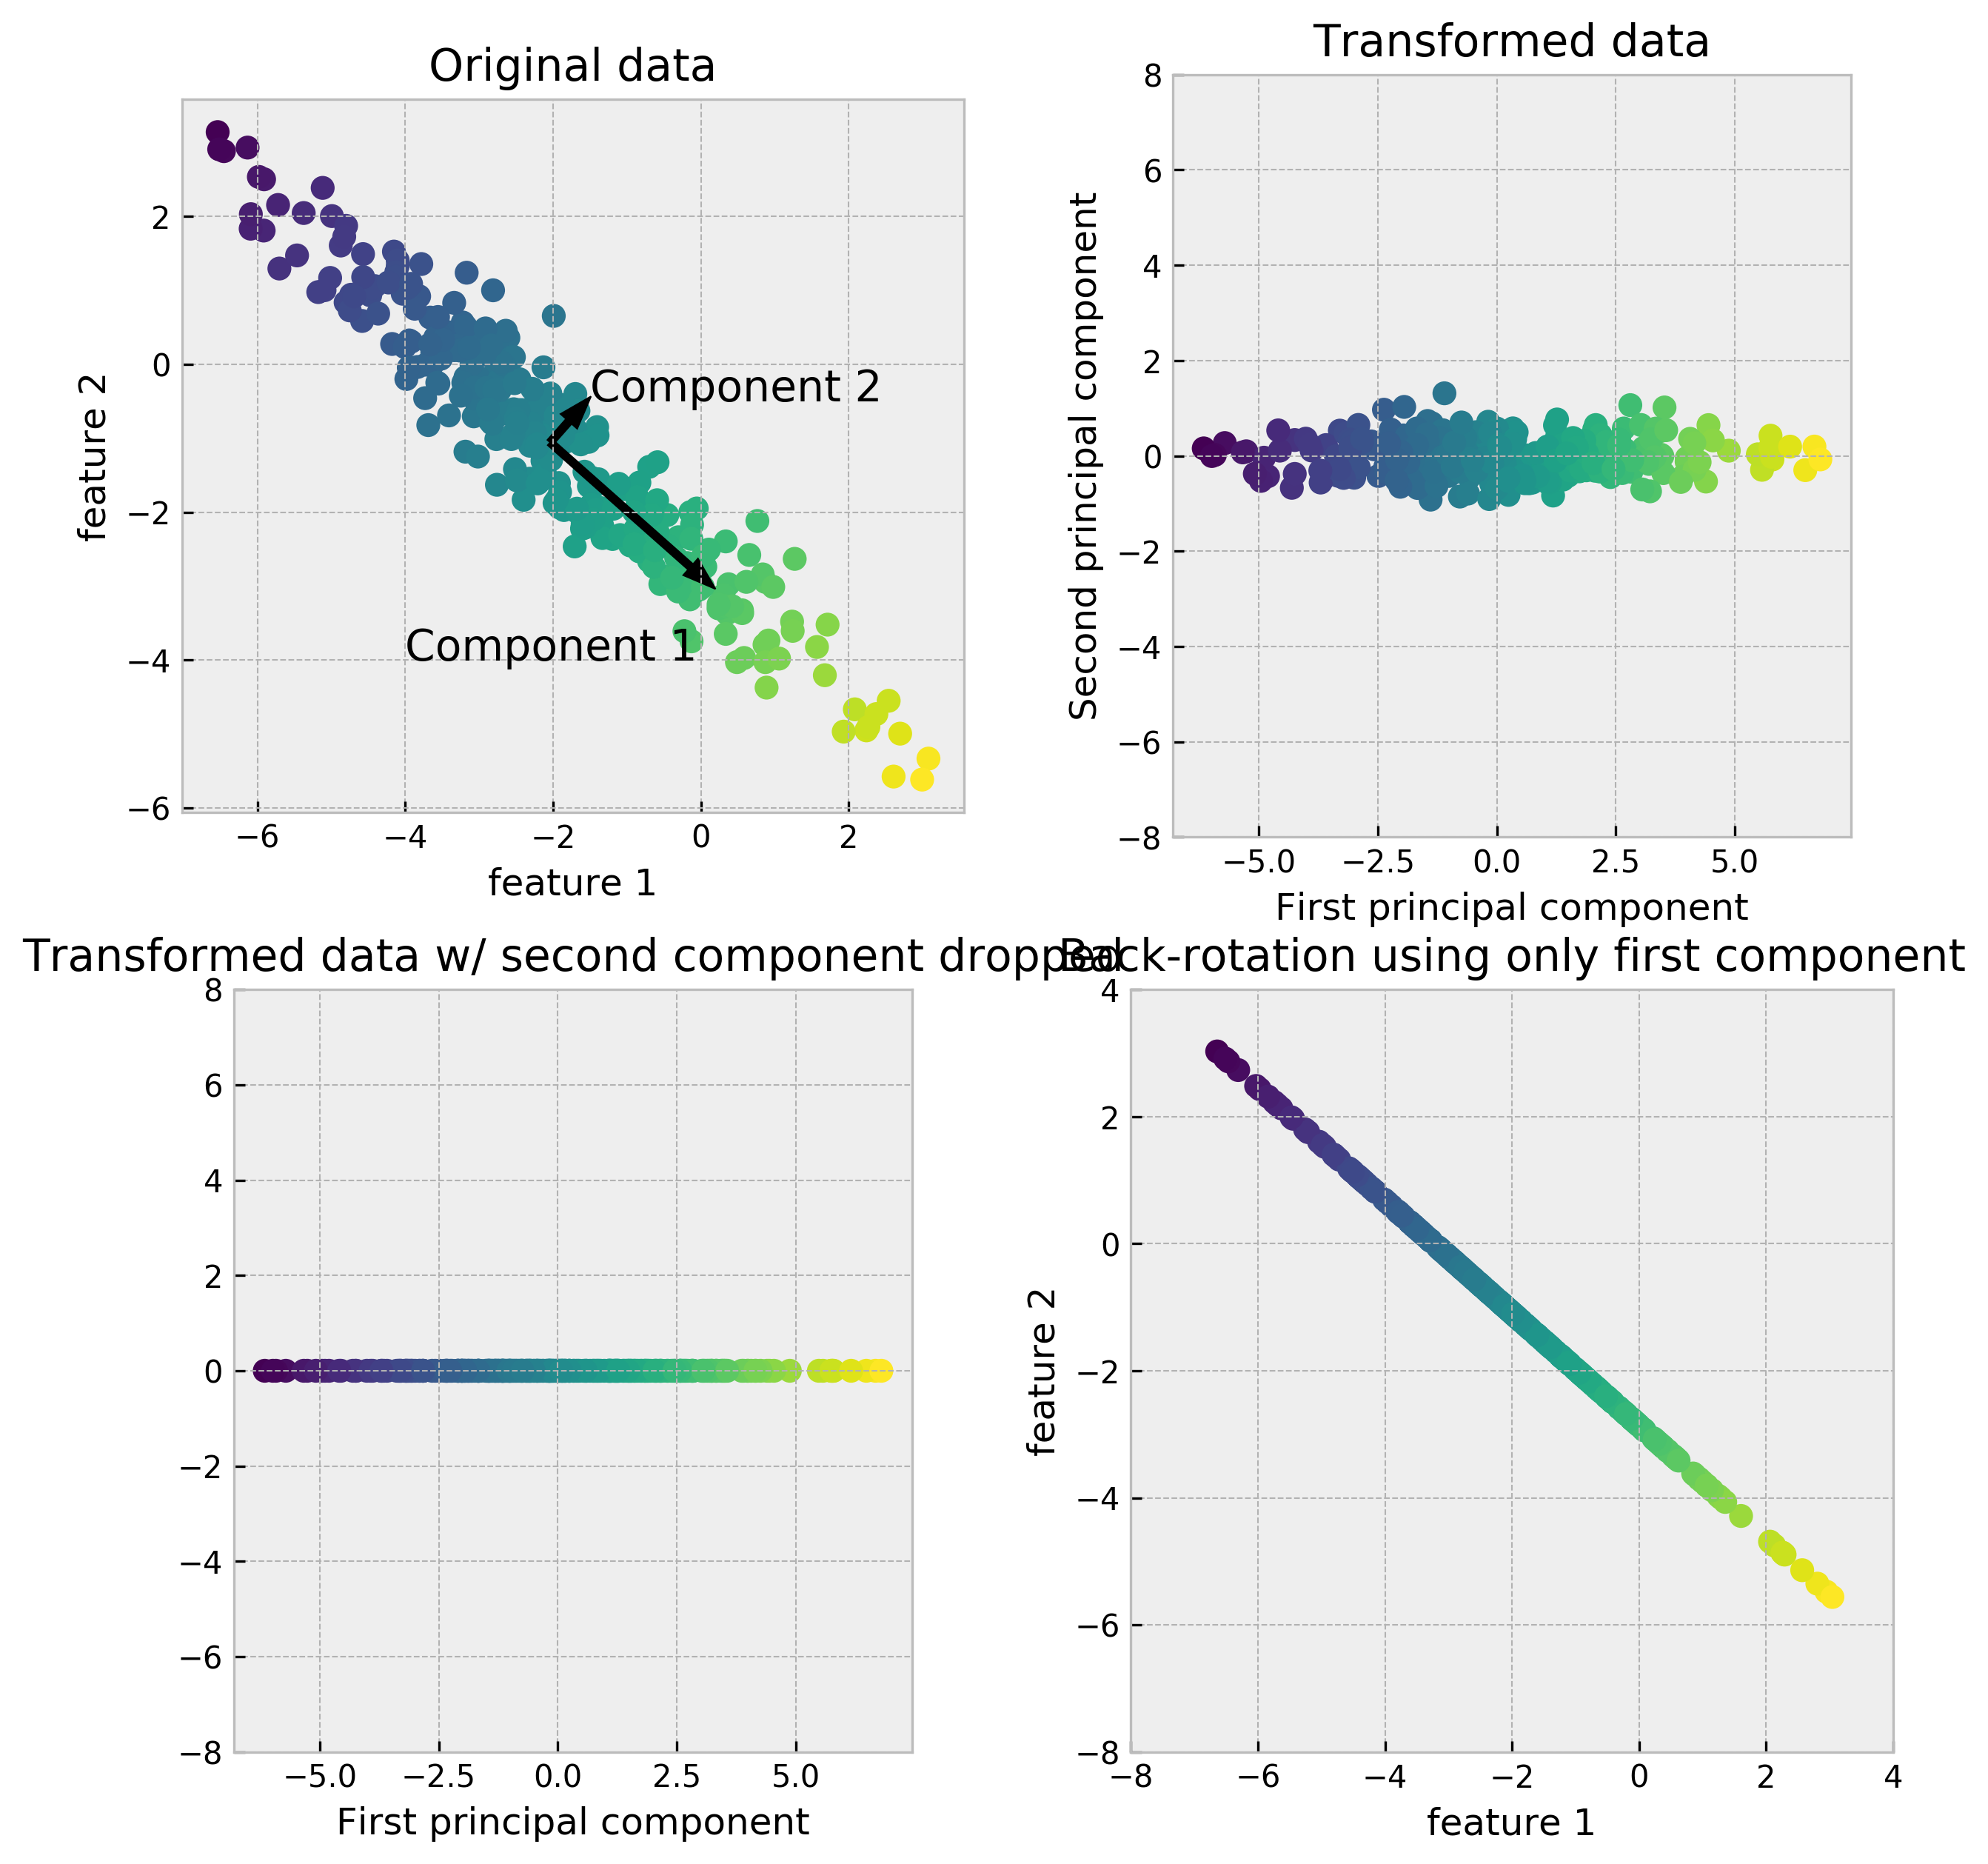

In [23]:
mglearn.plots.plot_pca_illustration()

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


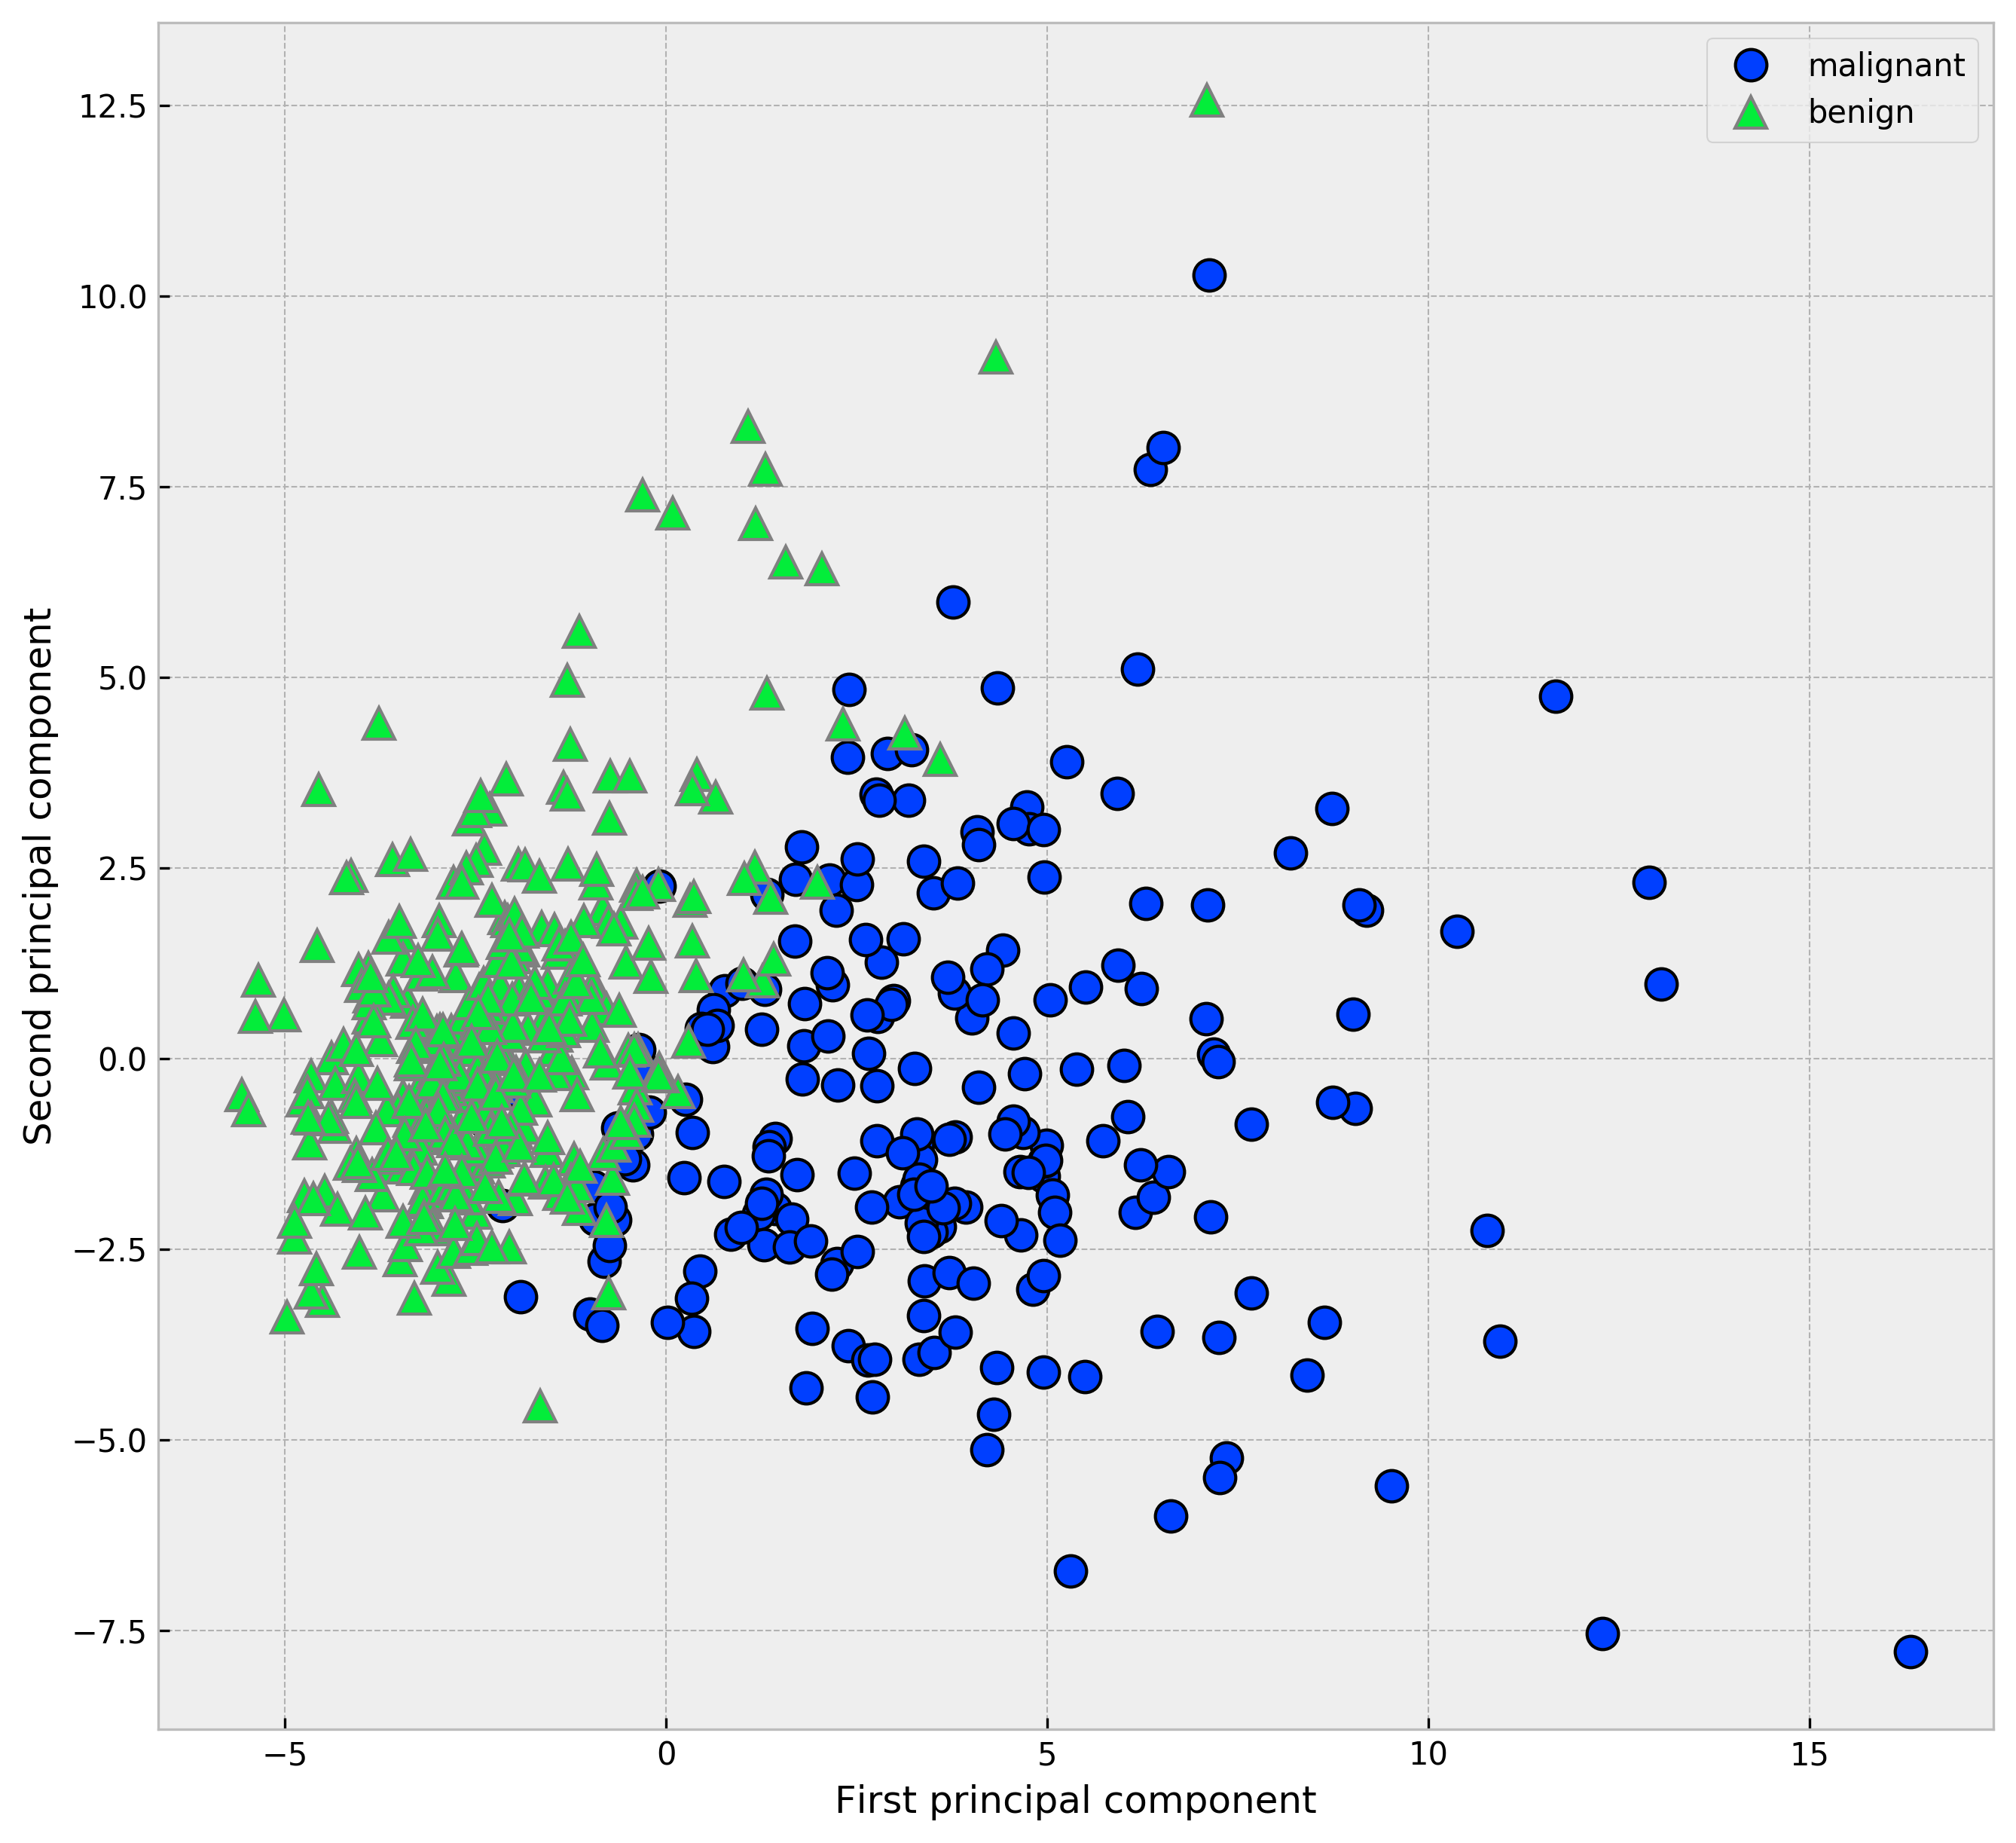

In [25]:
# plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## 微积分

#### 导数与偏导数

$\Large f(x)=x^n $

$\Large f(x)^{\prime}=nx^{n-1}$

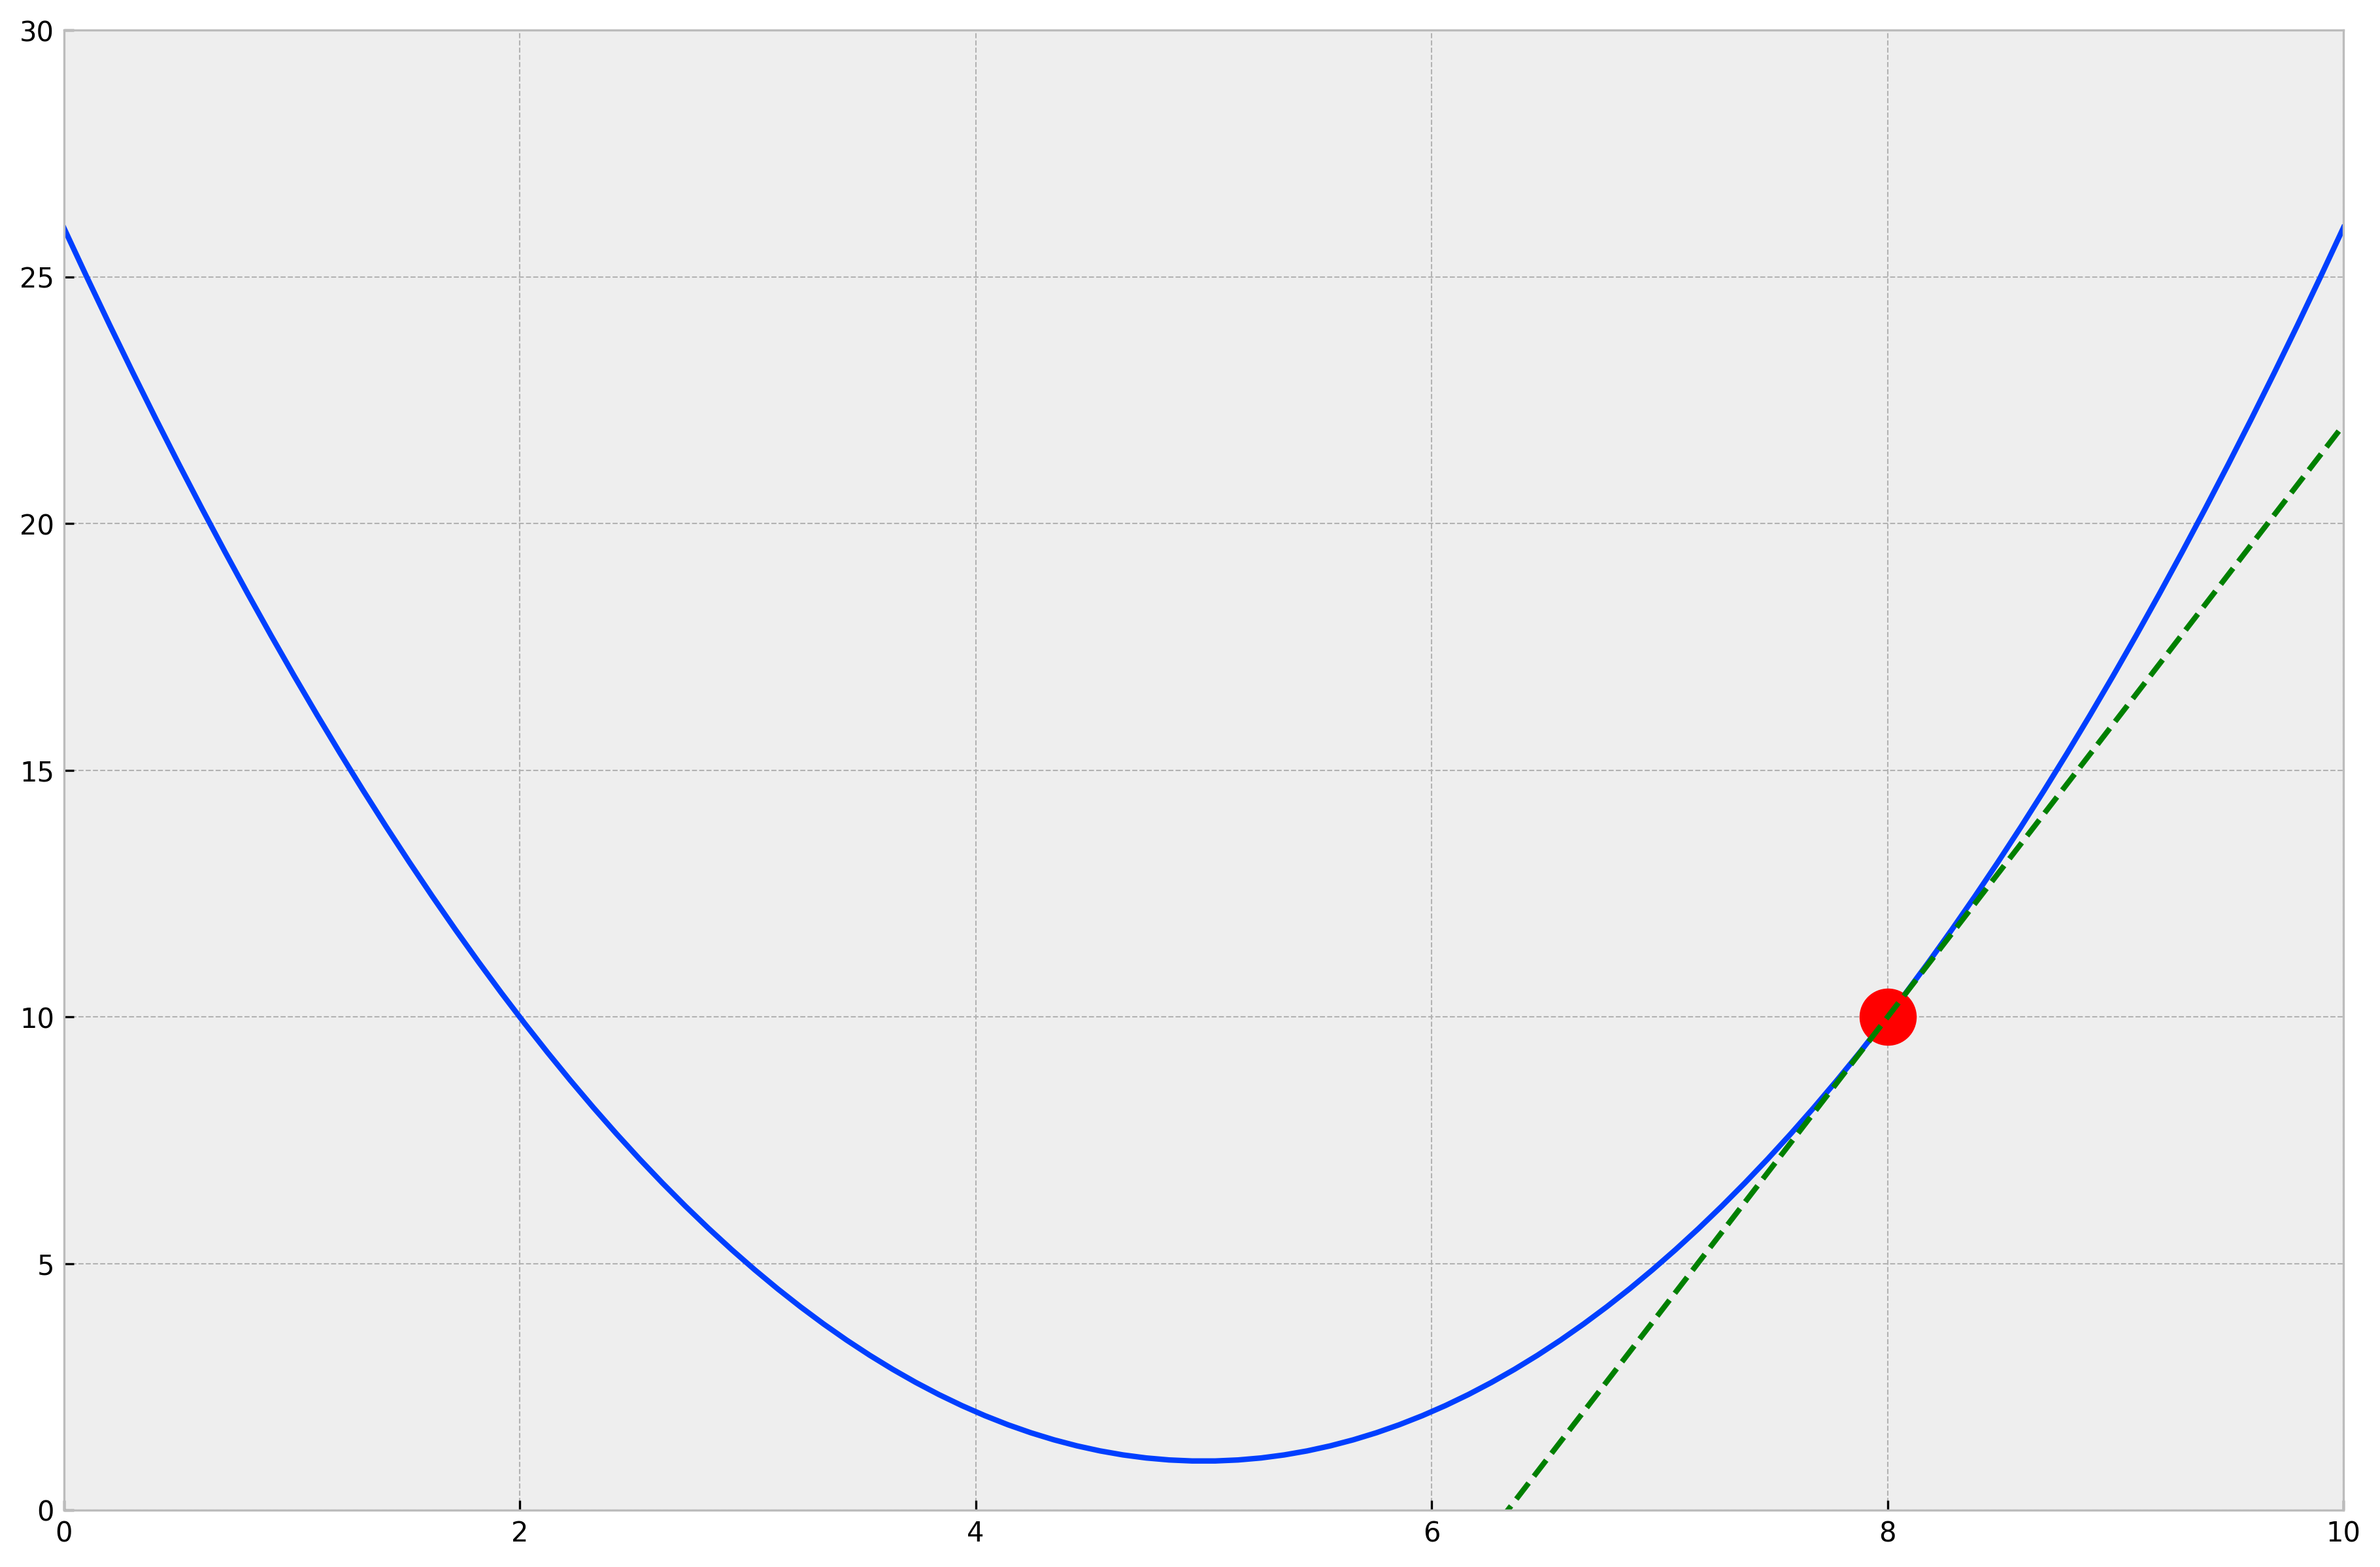

In [26]:
x=np.linspace(0,10,100)
y=(x-5)**2+1
plt.plot(x,y)
plt.axis([0, 10, 0, 30])
plt.plot(8,10,ms=20,marker='o',c='r')
plt.plot([5,8,10],[-8,10,22],'g--')

[在线演示](https://www.google.com/search?ei=S3f3W-PZM4mN0gL957HIAQ&q=y%3D%28x-5%29%5E2%2B1%2C+y%3D6x-38&oq=y%3D%28x-5%29%5E2%2B1%2C+y%3D6x-38&gs_l=psy-ab.3...2651.2651..3097...0.0..0.277.277.2-1......0....1..gws-wiz.pjWPa5BYrcY)

$\large z=f(x,y)=x^2+y^2 \\
\large \frac{\partial z}{\partial x} = 2x \\
\large \frac{\partial z}{\partial y} = 2y$

#### 梯度

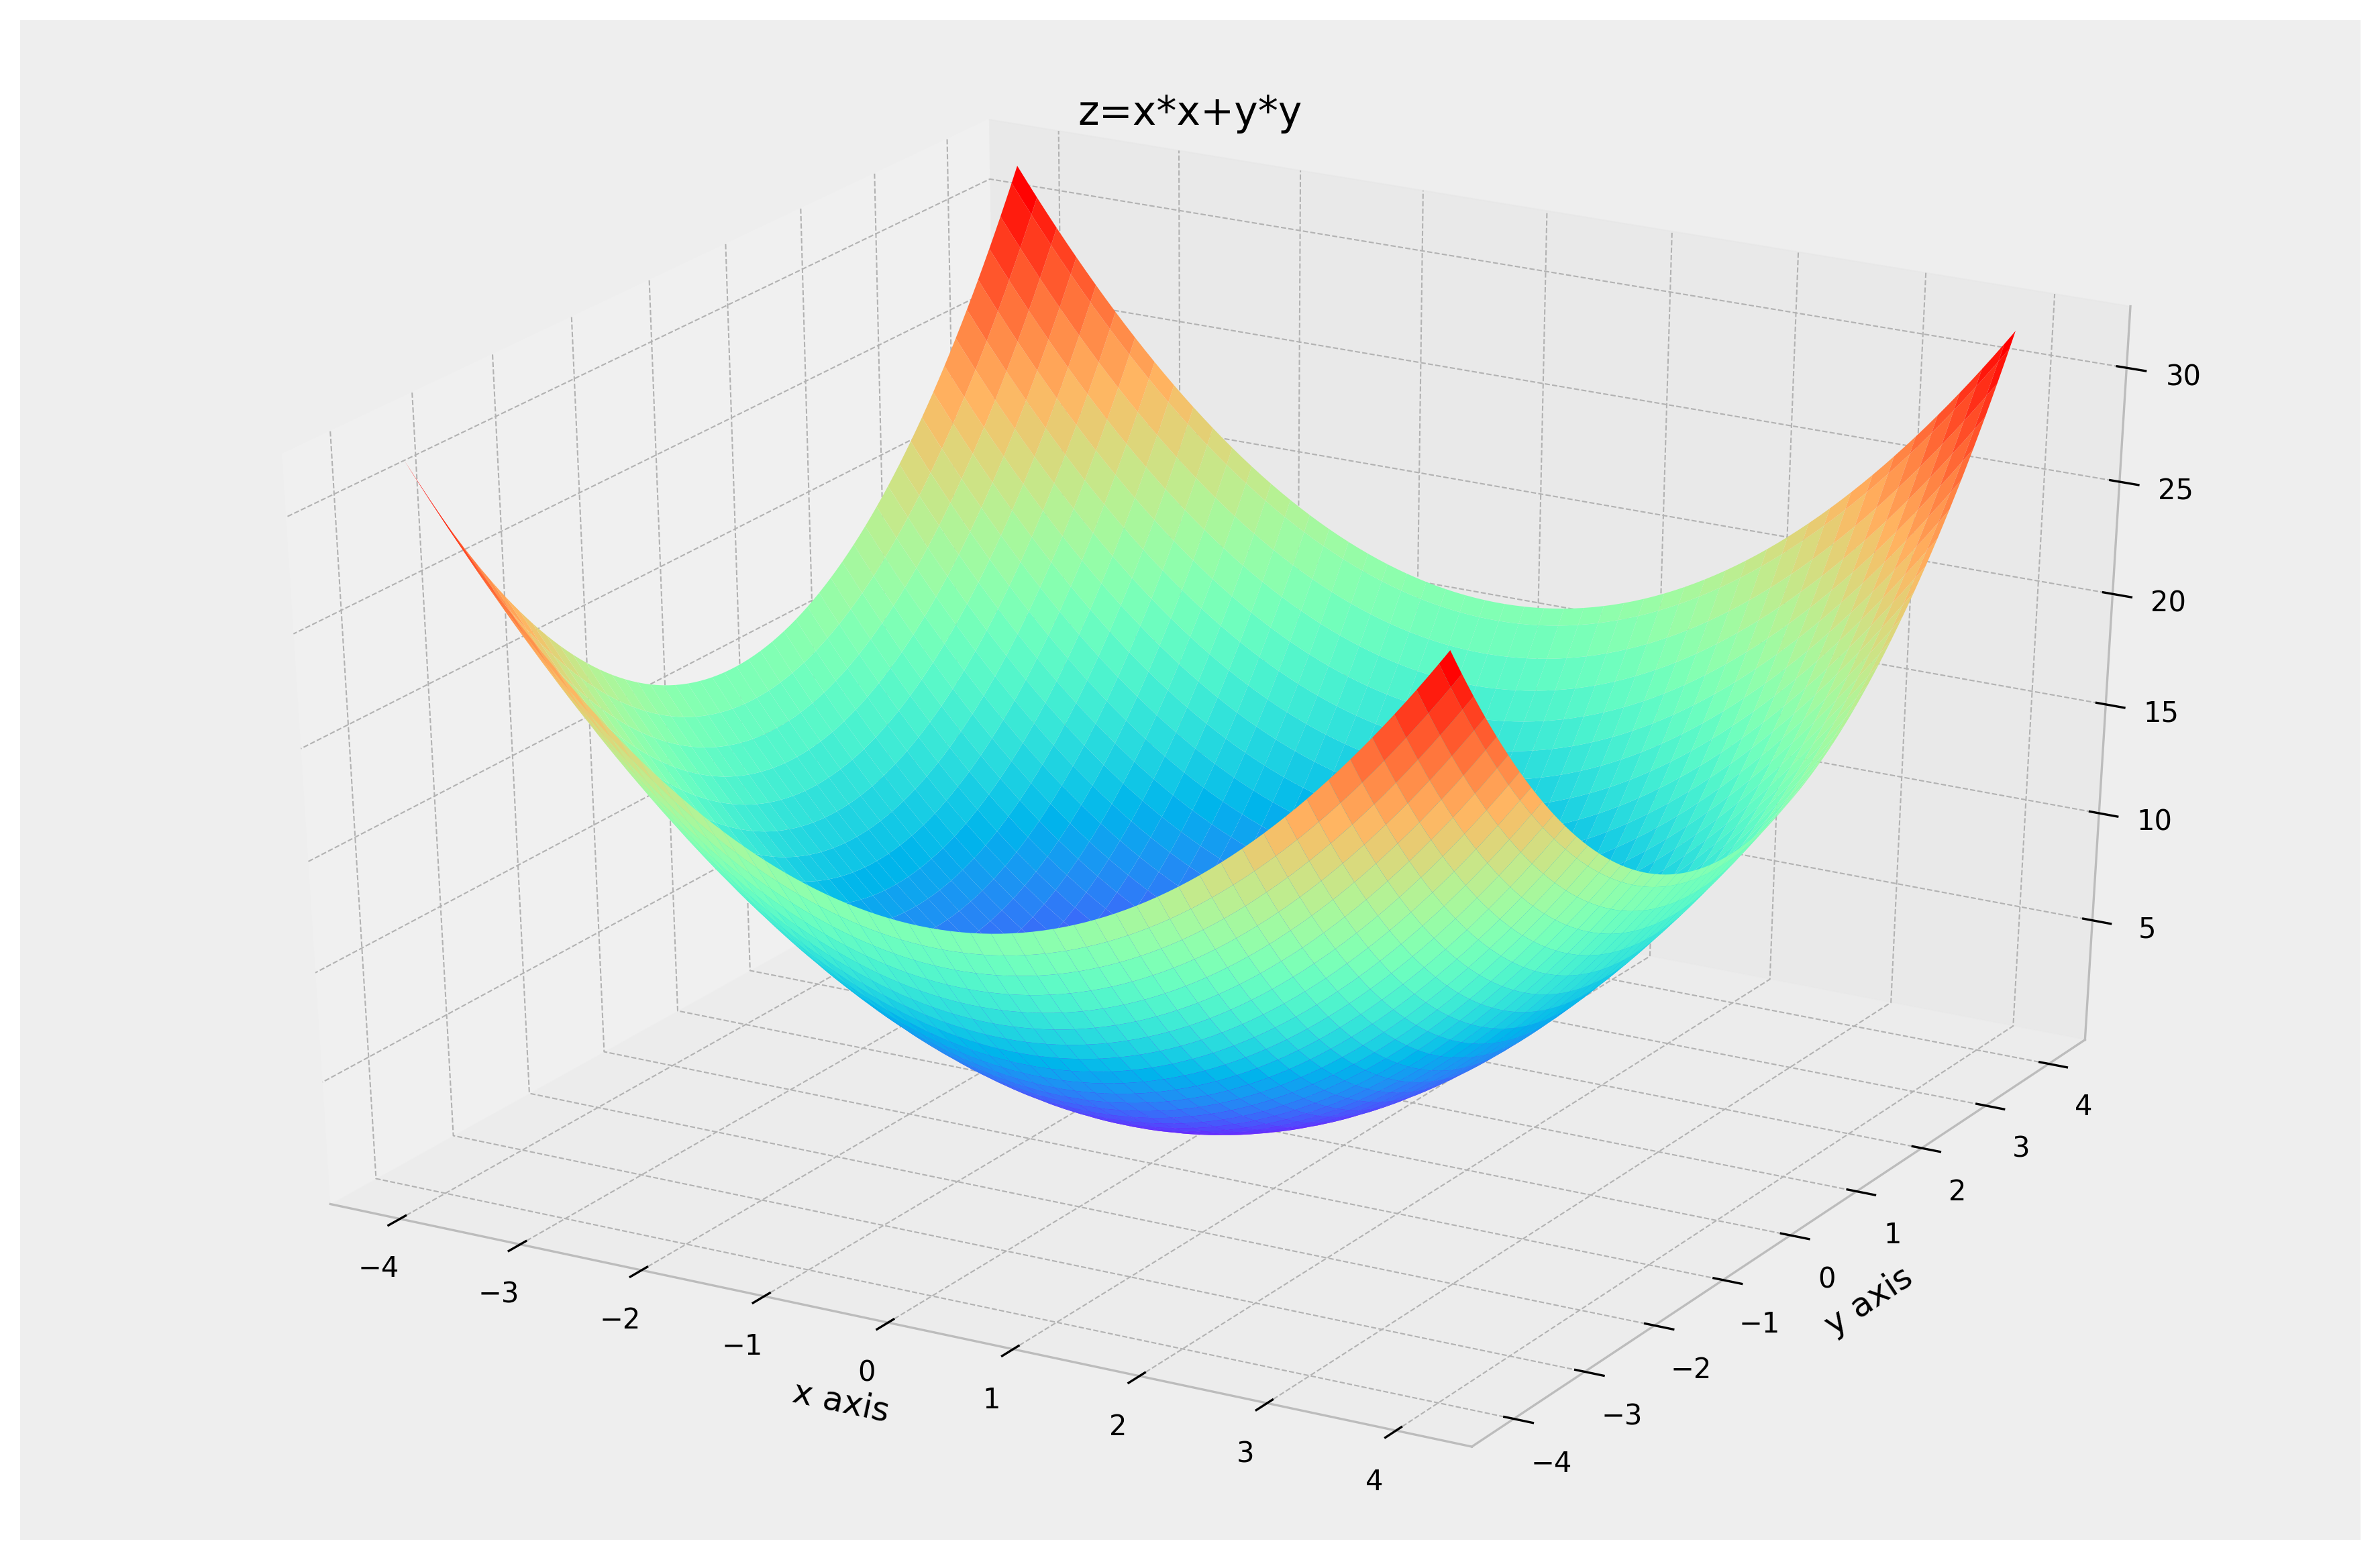

In [27]:
from mpl_toolkits.mplot3d import Axes3D
ax=plt.gca(projection='3d')
X,Y=np.mgrid[-4:4:100j,-4:4:100j]
Z = X**2+Y**2
# ax.figure.set_figheight(5)
# ax.figure.set_figwidth(3)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=plt.get_cmap('rainbow'))
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title('z=x*x+y*y')

[在线演示](https://www.google.com/search?ei=jnD3W7j2DpL90wLR-6OABQ&q=z%3Dx%5E2%2By%5E2&oq=z%3Dx%5E2%2By%5E2&gs_l=psy-ab.3..0i203l7j0j0i203j0i30.1204151.1211830..1212646...0.0..0.260.1238.2-5......0....1..gws-wiz.......35i39j0i13i30.OkFK0jhe_As)

在任意点(x,y)的偏导数向量，构成了该点的梯度
$$\Large \overrightarrow{\left(x,y\right)}=\left(\frac{\partial z}{\partial x},\frac{\partial z}{\partial y} \right)$$

![](https://img2018.cnblogs.com/news/66372/201811/66372-20181126121742036-1488396341.jpg)

# 机器学习入门篇

## 线性回归

#### [最小二乘法](https://baike.baidu.com/item/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95)

y=ax+b

w[0]: 0.393906  b: -0.031804


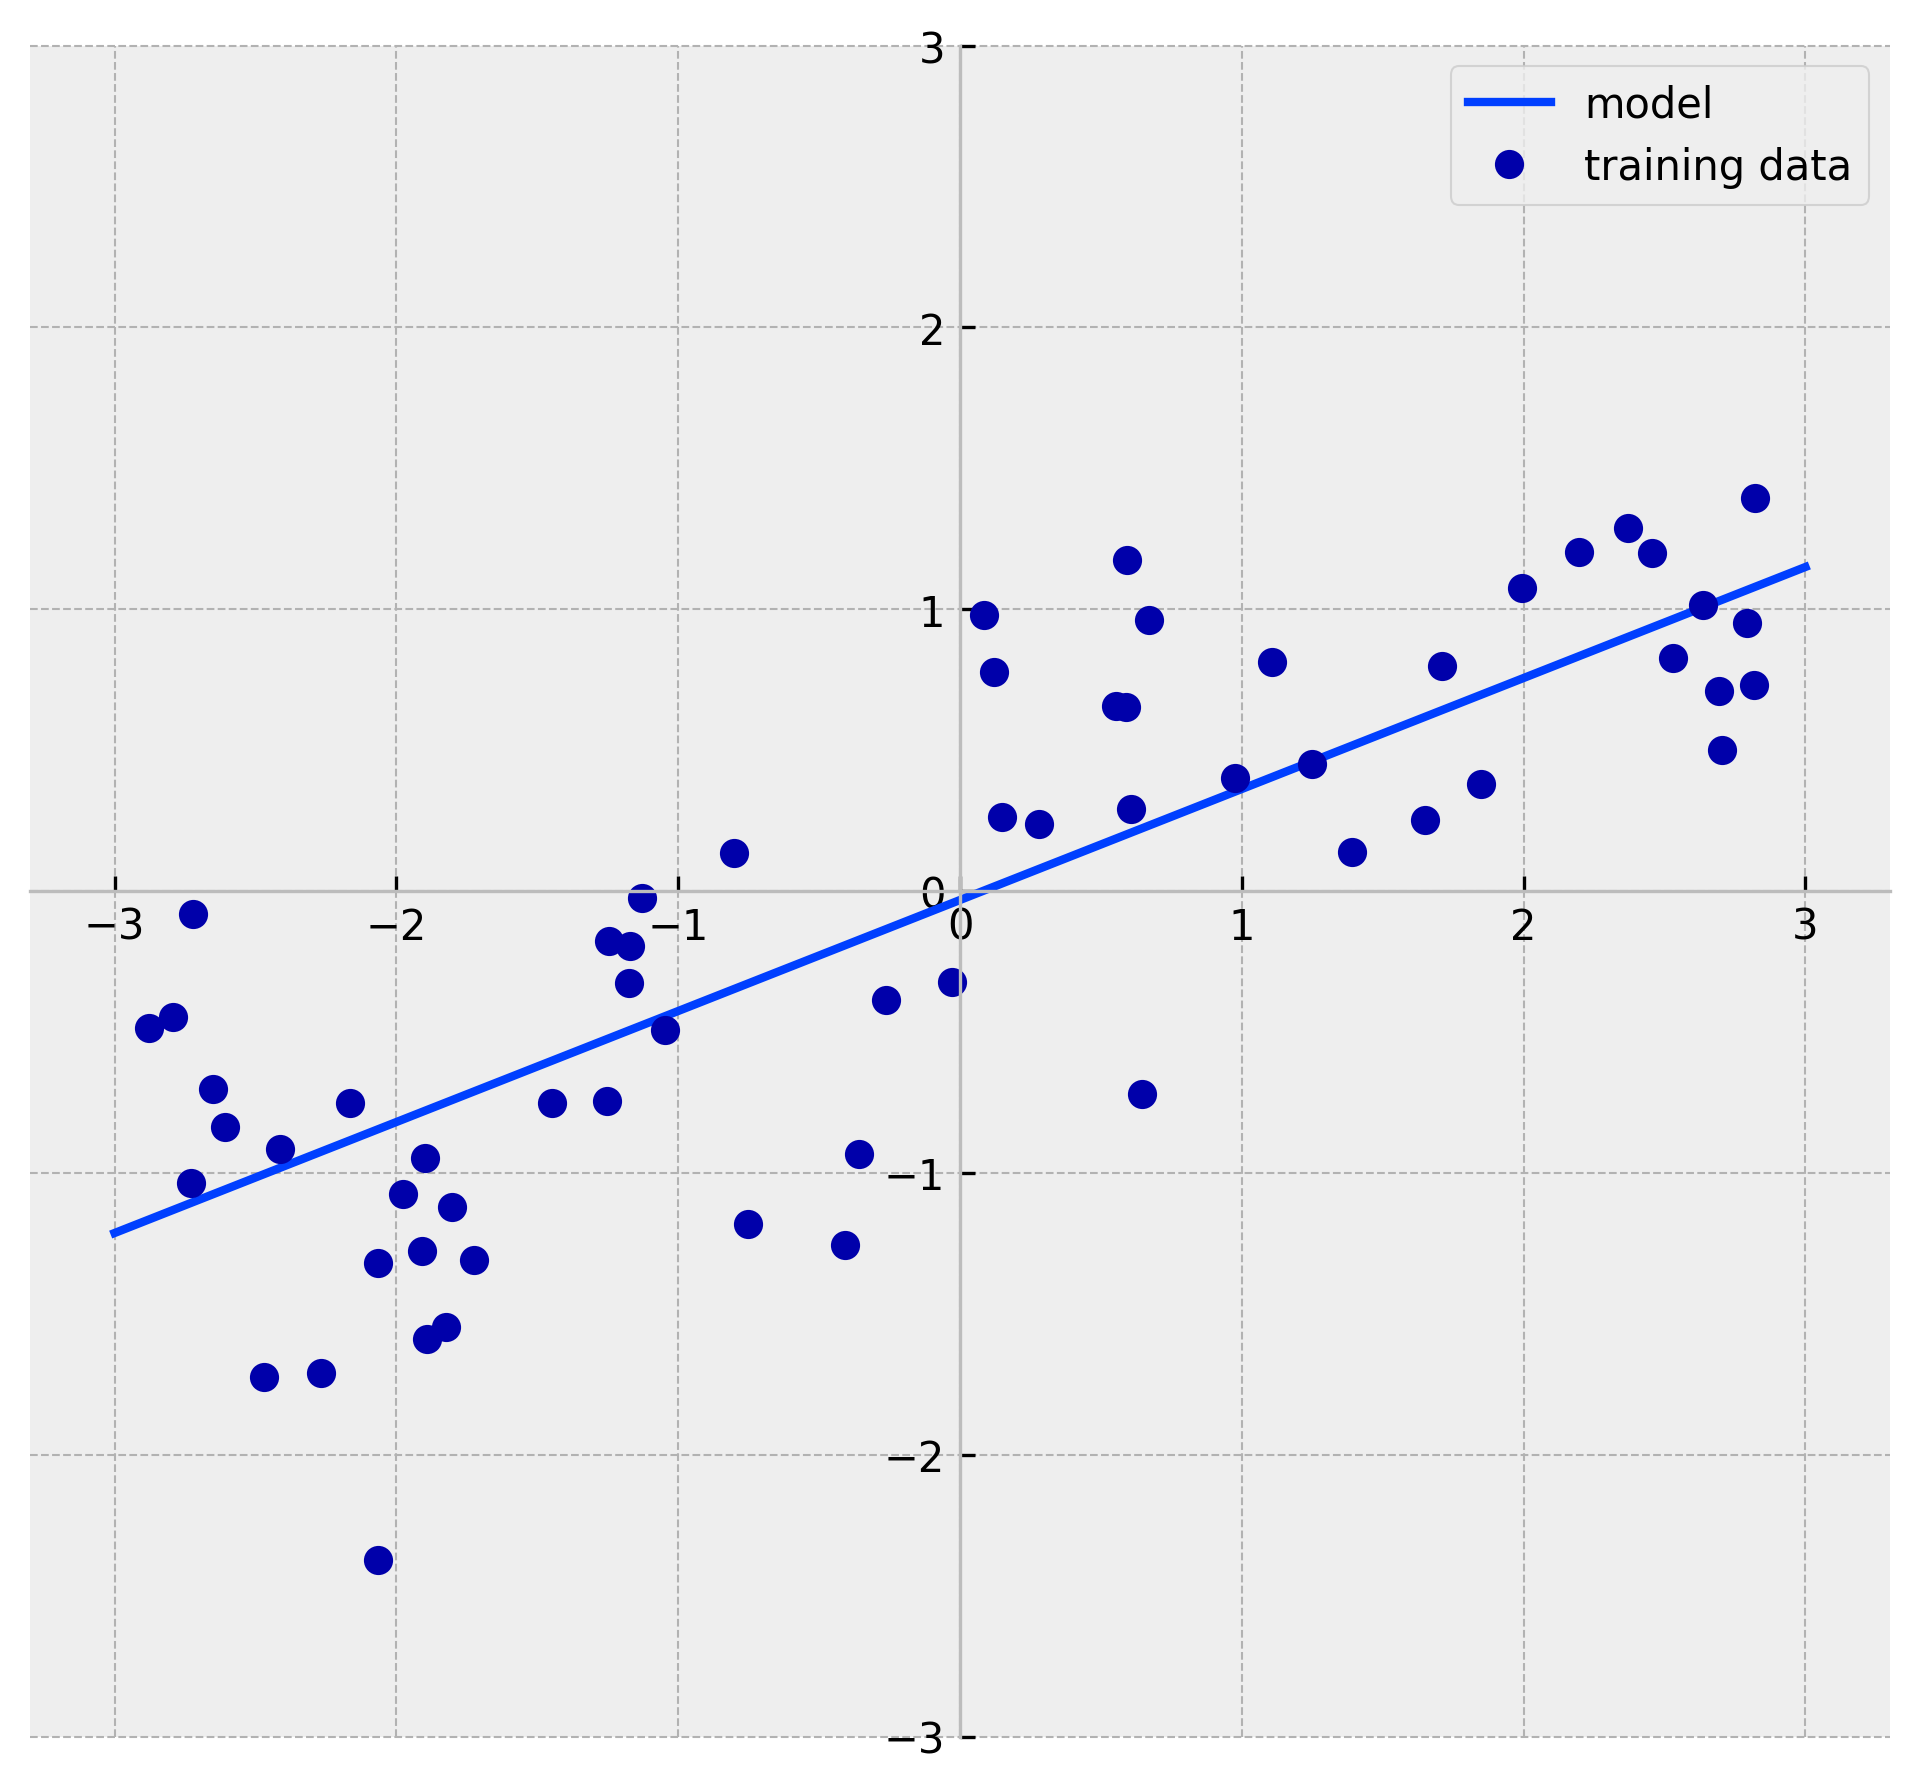

In [28]:
mglearn.plots.plot_linear_regression_wave()

#### [梯度下降](https://zh.wikipedia.org/wiki/%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95)与学习率

${\mathbf  {b}}={\mathbf  {a}}-\gamma \nabla F({\mathbf  {a}})$

a= 1.184 b= 2.51023


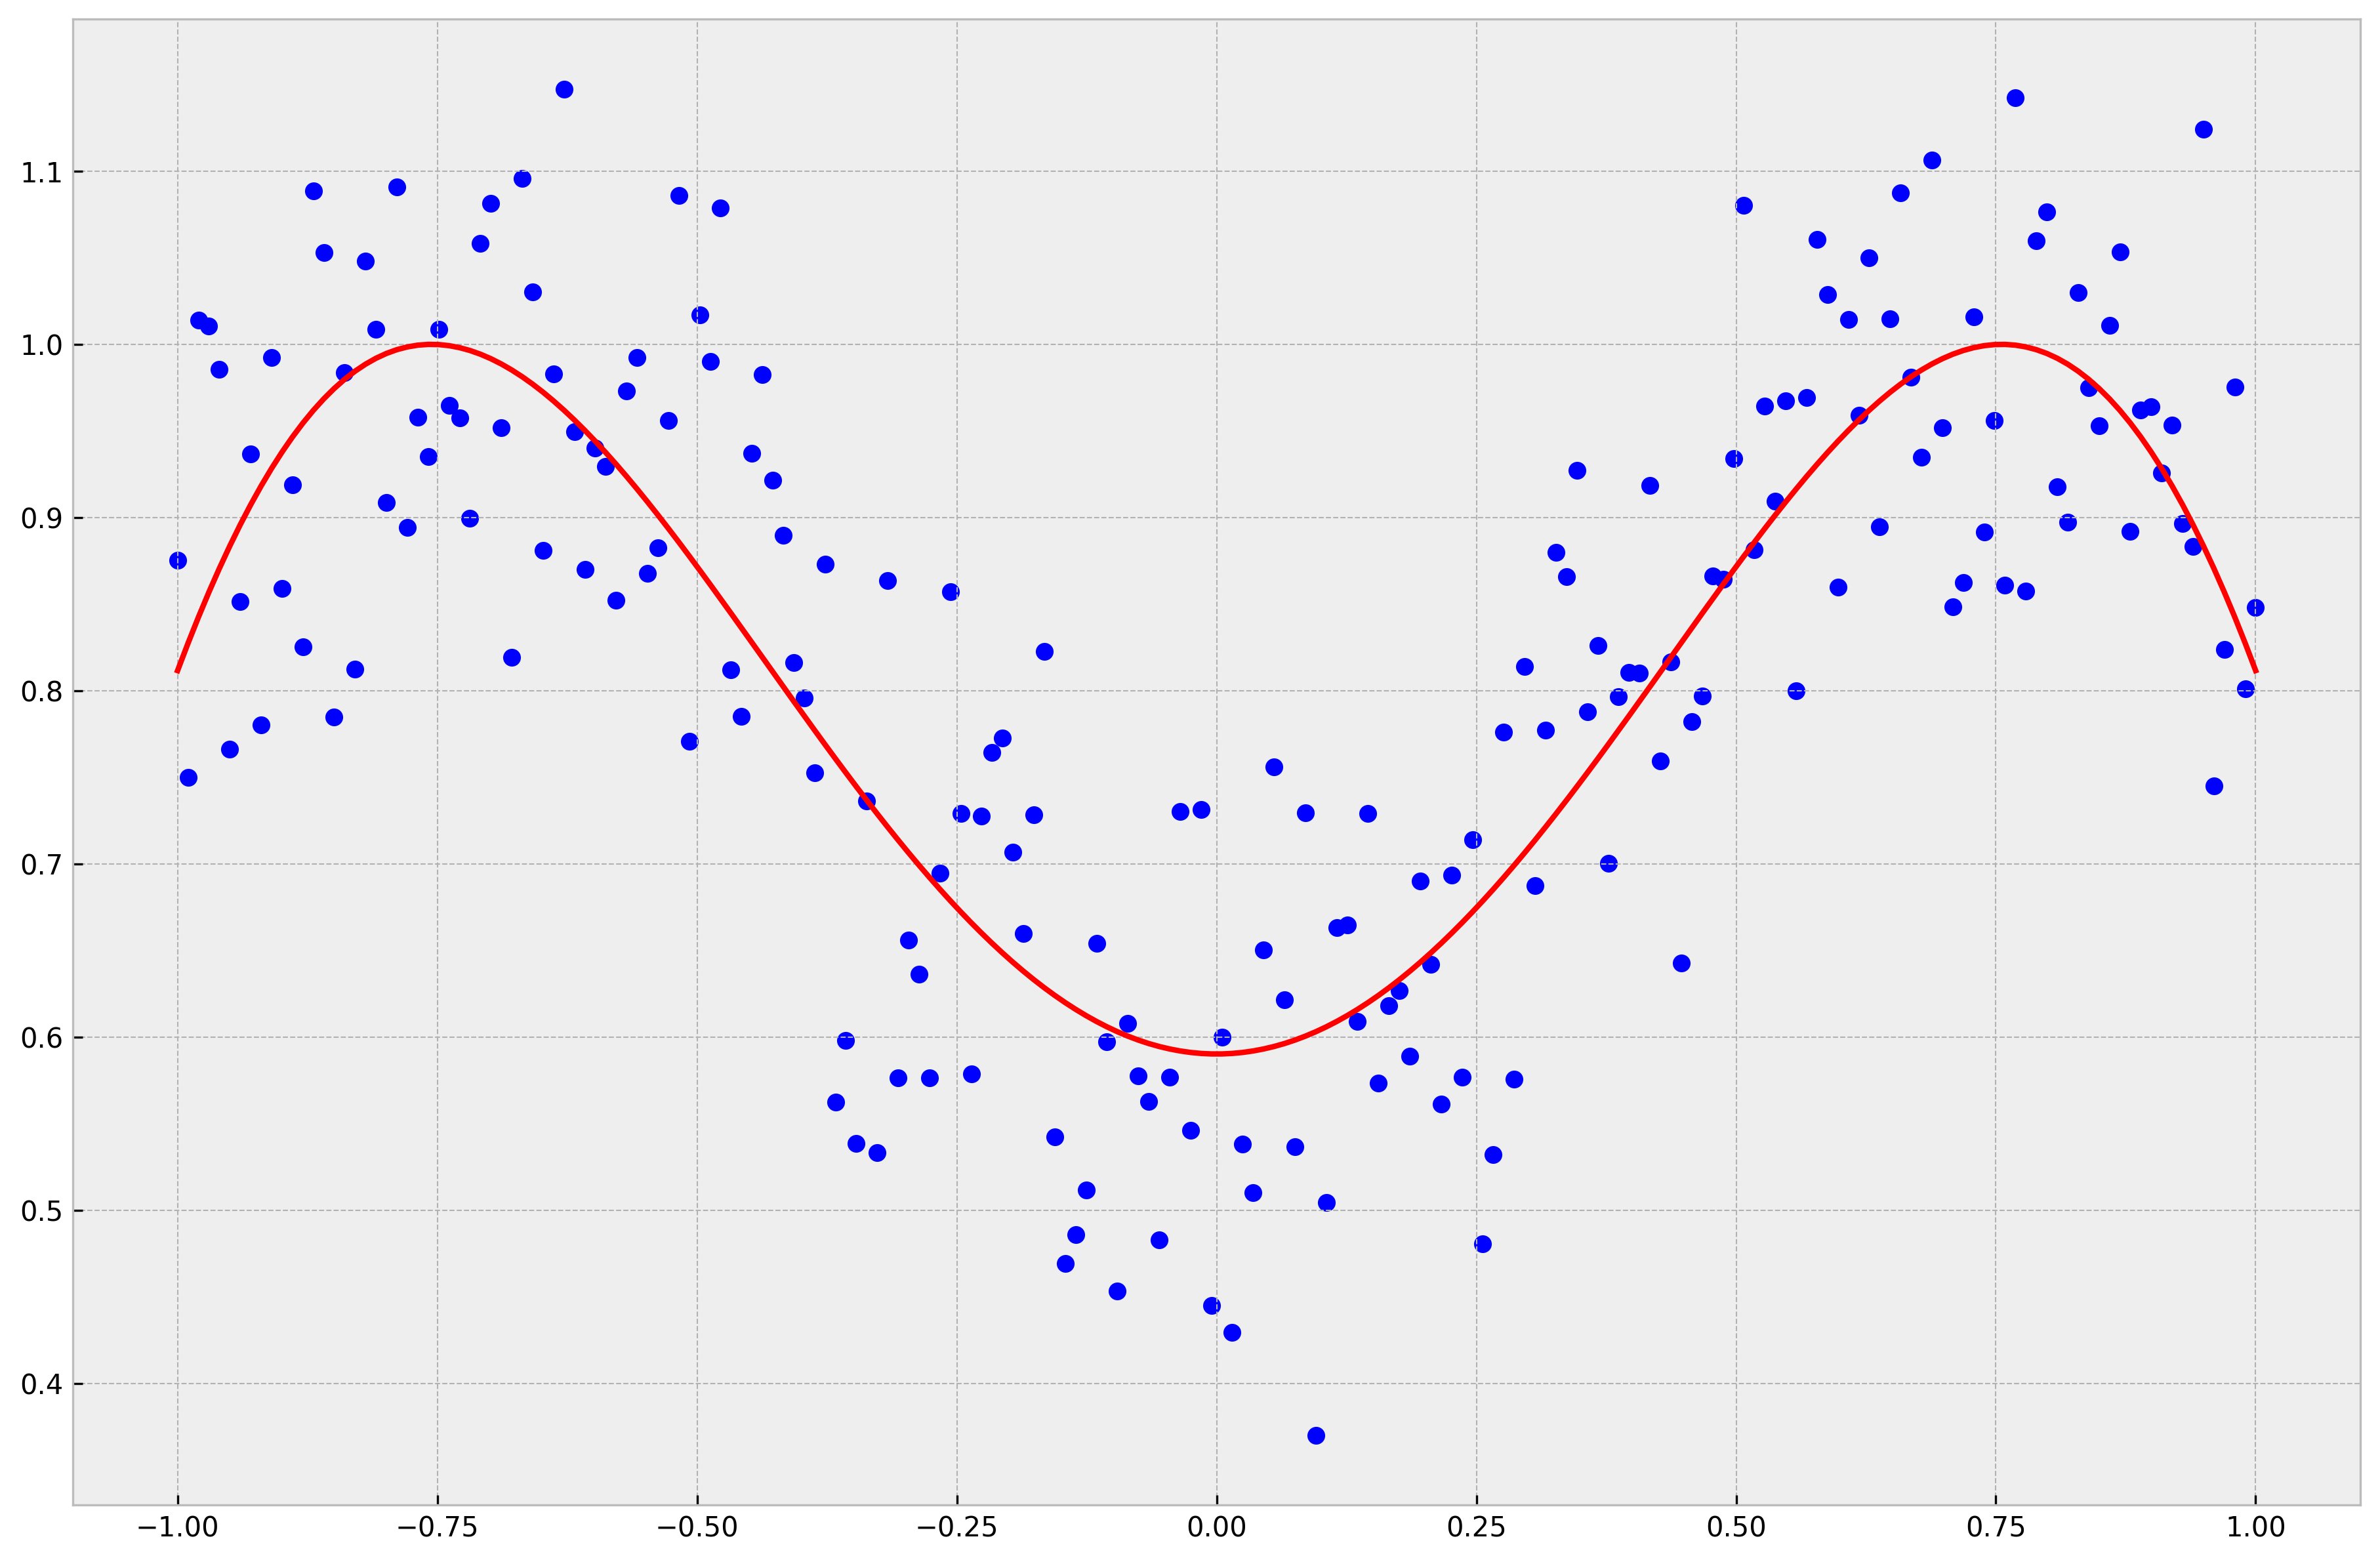

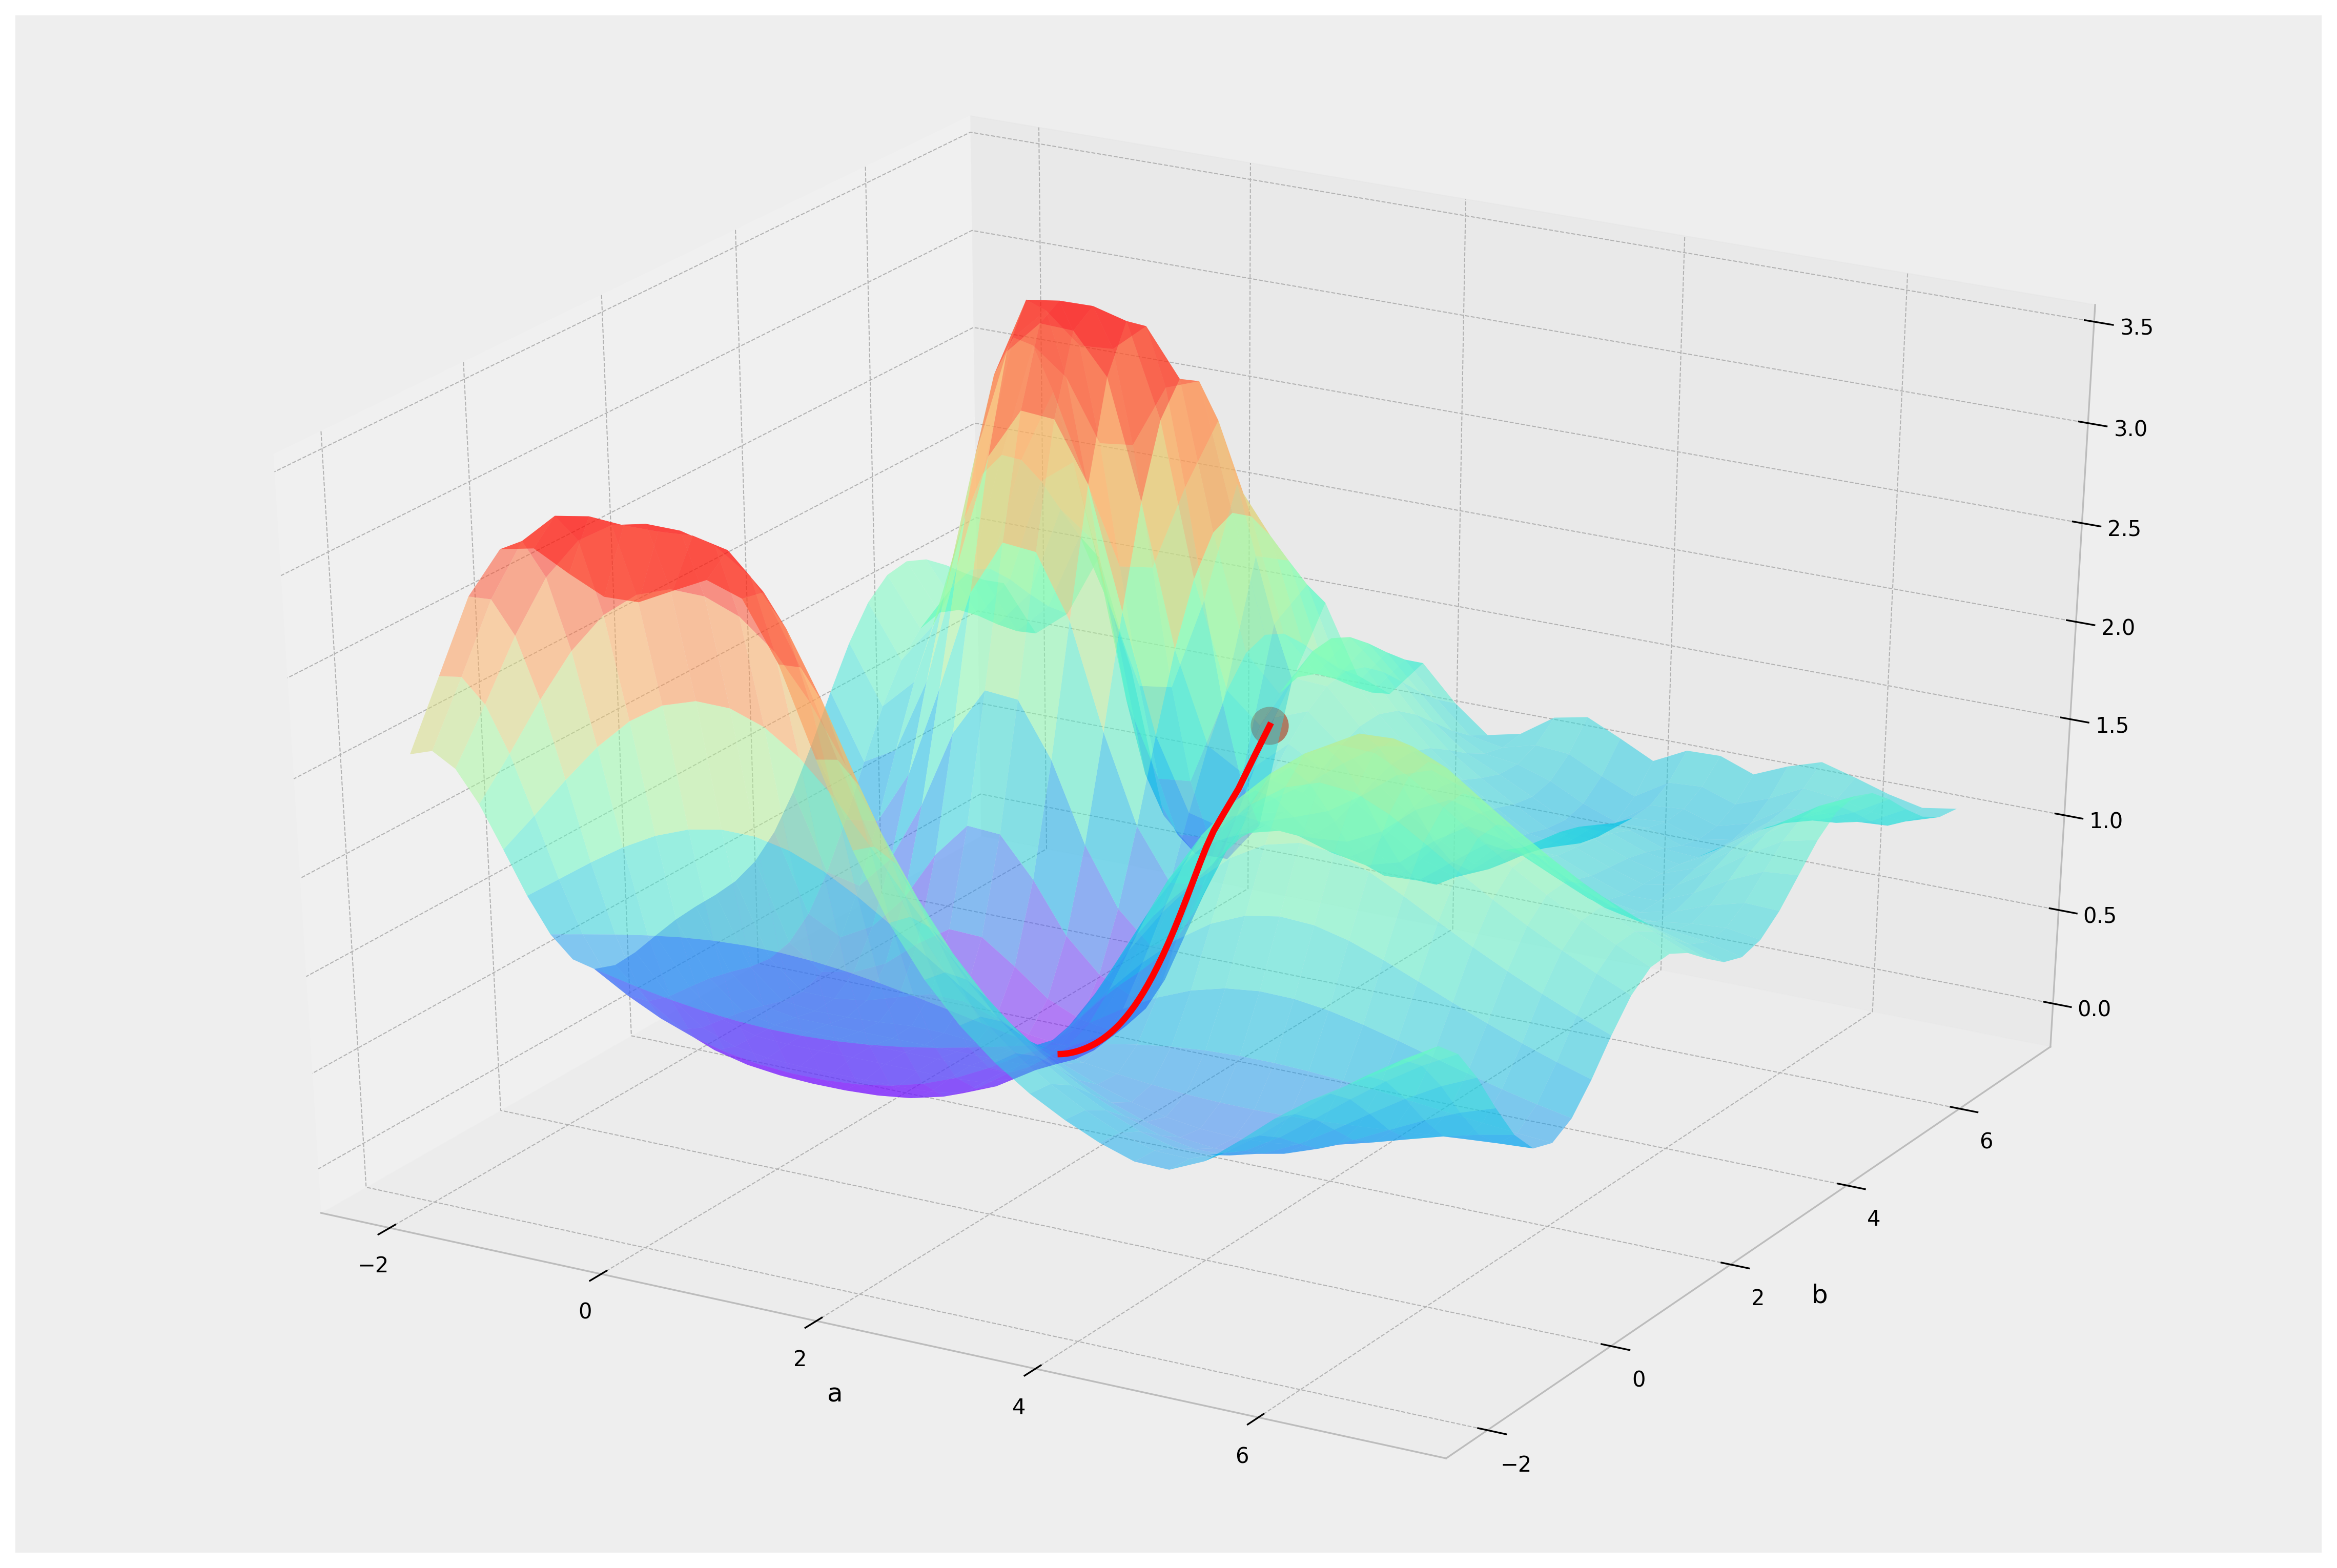

In [29]:
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D

LR = 0.1
REAL_PARAMS = [1.2, 2.5]
INIT_PARAMS = [[5, 4],
               [5, 1],
               [2, 4.5]][2]

x = np.linspace(-1, 1, 200, dtype=np.float32)
y_fun = lambda a, b: np.sin(b*np.cos(a*x))
tf_y_fun = lambda a, b: tf.sin(b*tf.cos(a*x))

noise = np.random.randn(200)/10
y = y_fun(*REAL_PARAMS) + noise         # target

# tensorflow graph
a, b = [tf.Variable(initial_value=p, dtype=tf.float32) for p in INIT_PARAMS]
pred = tf_y_fun(a, b)
mse = tf.reduce_mean(tf.square(y-pred))
train_op = tf.train.GradientDescentOptimizer(LR).minimize(mse)

a_list, b_list, cost_list = [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t in range(400):
        a_, b_, mse_ = sess.run([a, b, mse])
        a_list.append(a_); b_list.append(b_); cost_list.append(mse_)    # record parameter changes
        result, _ = sess.run([pred, train_op])                          # training


# visualization codes:
print('a=', a_, 'b=', b_)
plt.figure(1)
plt.scatter(x, y, c='b')    # plot data
plt.plot(x, result, 'r-', lw=2)   # plot line fitting
# 3D cost figure
fig = plt.figure(2); ax = Axes3D(fig)
a3D, b3D = np.meshgrid(np.linspace(-2, 7, 30), np.linspace(-2, 7, 30))  # parameter space
cost3D = np.array([np.mean(np.square(y_fun(a_, b_) - y)) for a_, b_ in zip(a3D.flatten(), b3D.flatten())]).reshape(a3D.shape)
ax.plot_surface(a3D, b3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.5)
ax.scatter(a_list[0], b_list[0], zs=cost_list[0], s=300, c='r')  # initial parameter place
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.plot(a_list, b_list, zs=cost_list, zdir='z', c='r', lw=3)    # plot 3D gradient descent

又一个例子，TensorFlow 通过数次的迭代，看它们学习的值

y=0.1x+0.3

In [30]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3
Weights = tf.Variable(tf.random_uniform([1],-1,1))
biases = tf.Variable(tf.zeros([1]))

In [31]:
y = Weights*x_data + biases
loss=tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [32]:
session = tf.Session()
session.run(init)

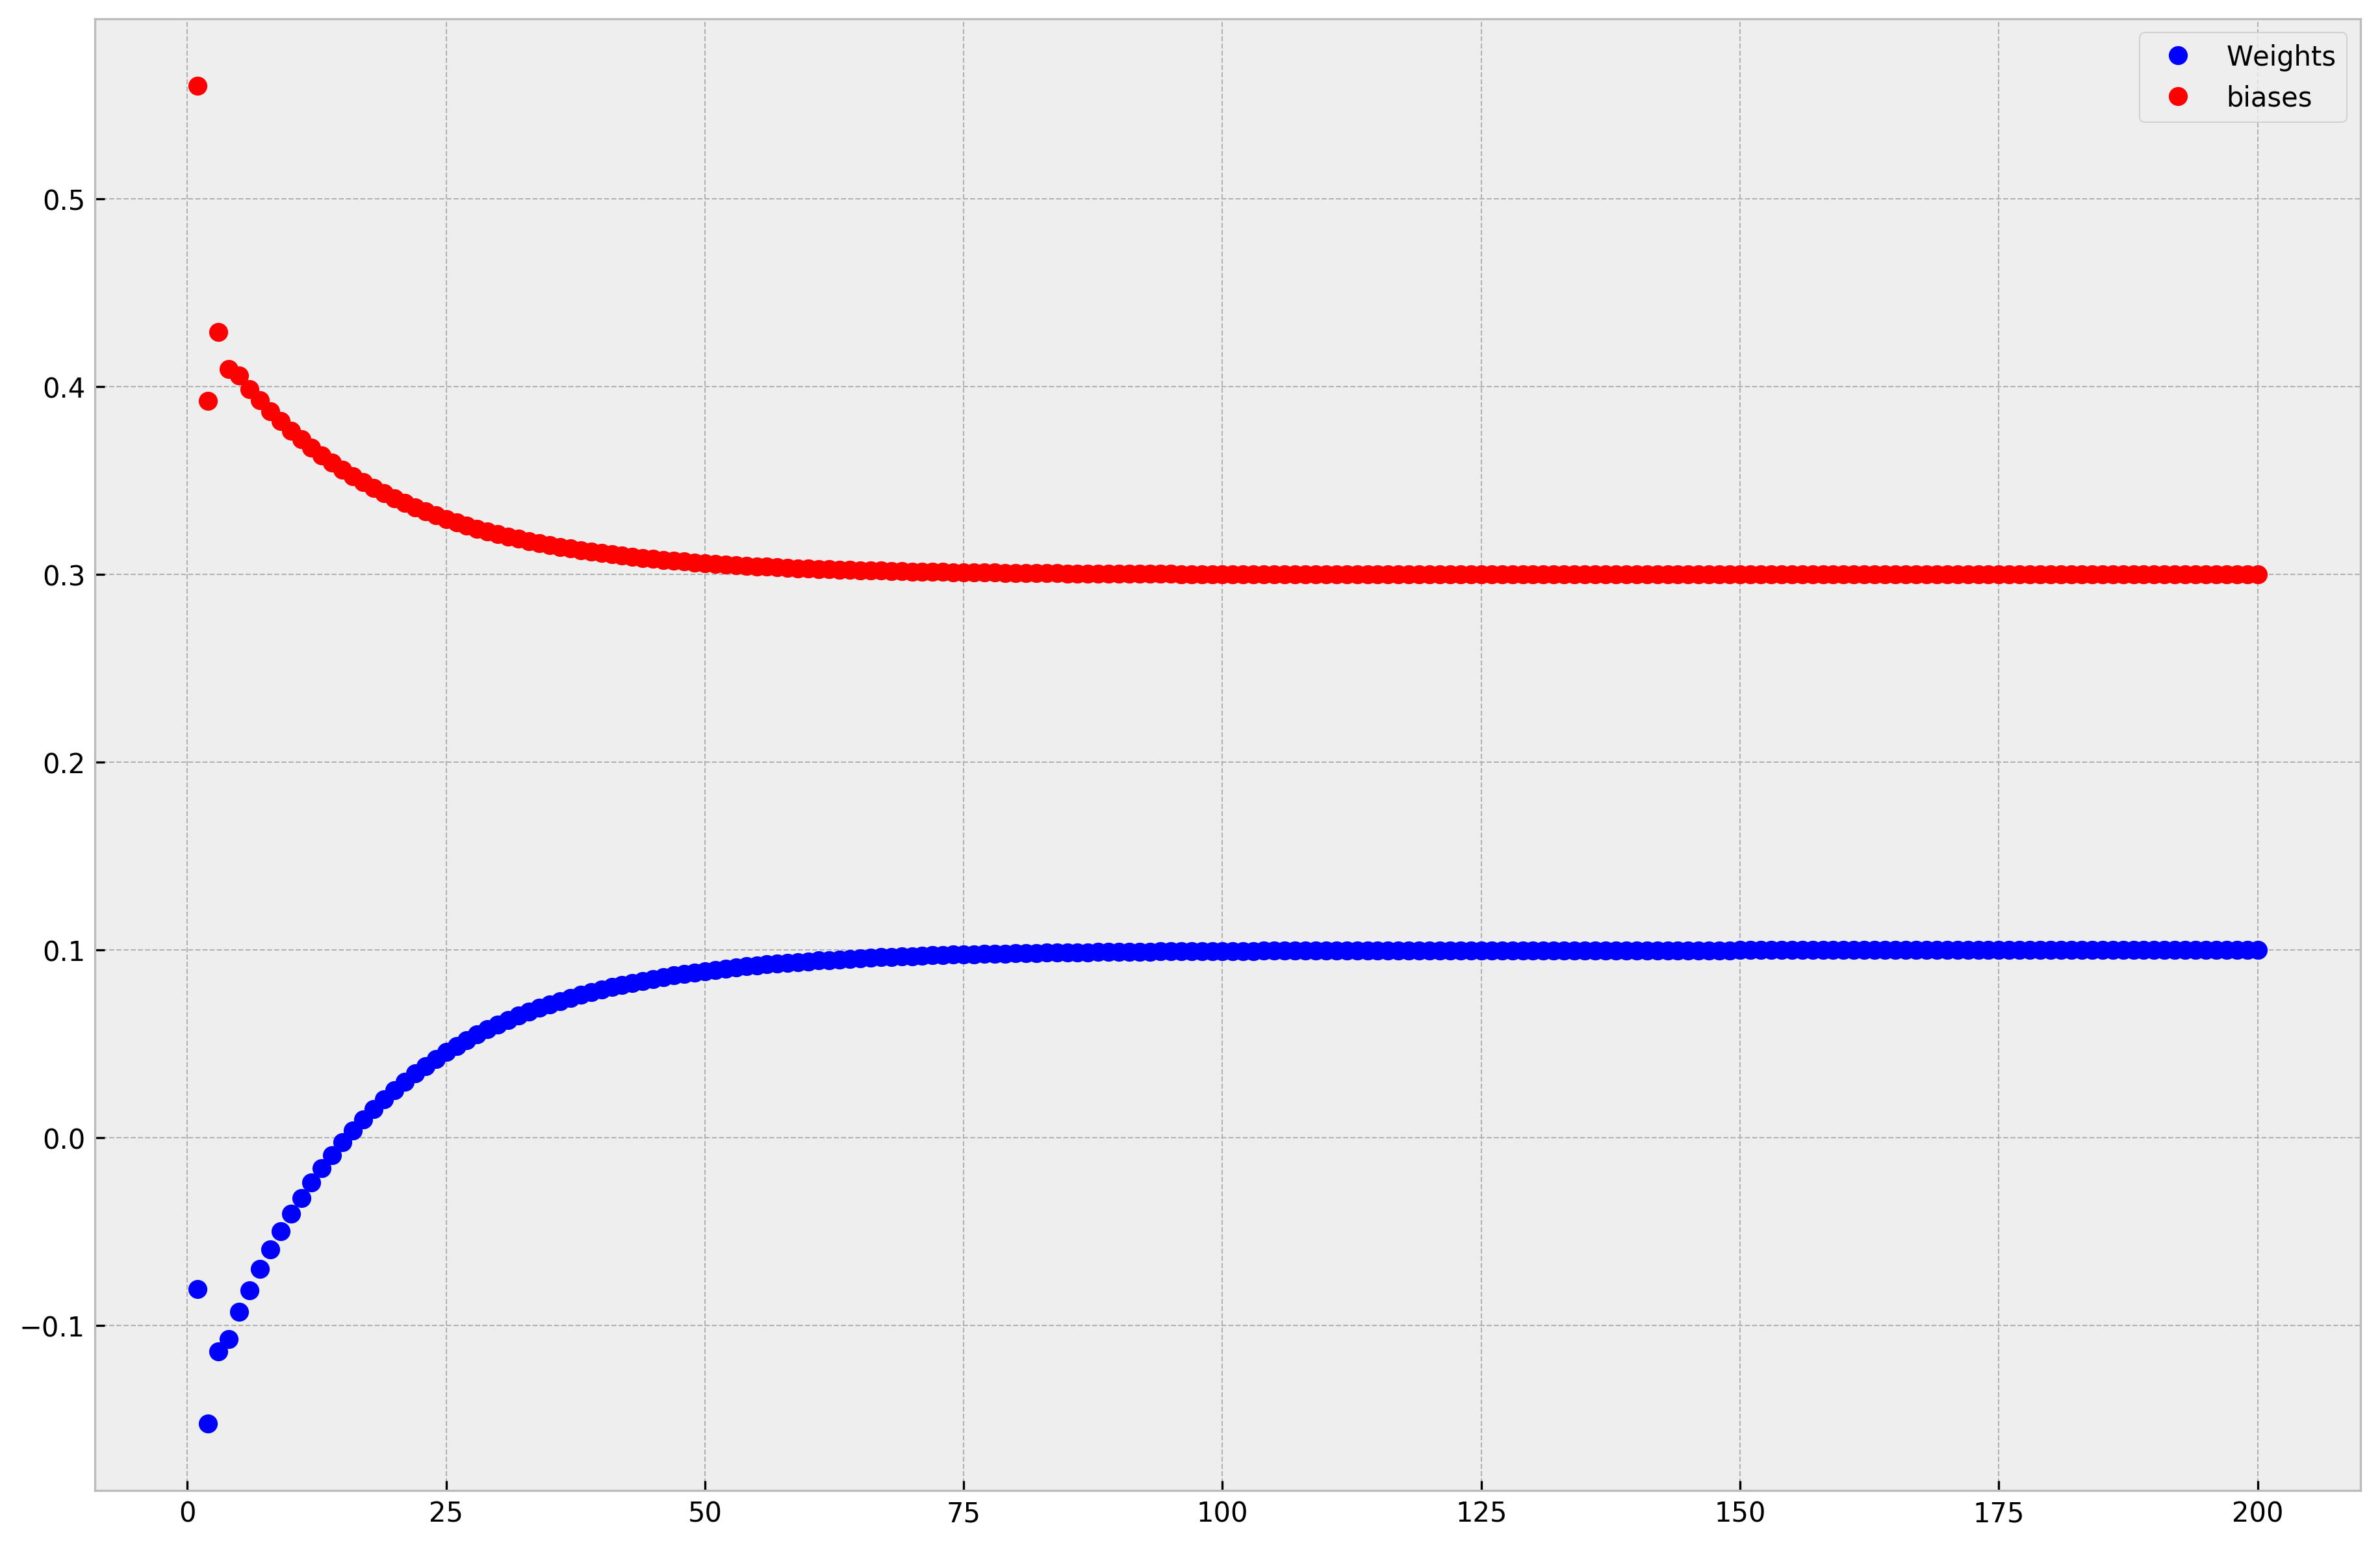

In [33]:
w=[];b=[]
iter_arr = range(1,201)
for _ in iter_arr:
    session.run(train)
    w.append(session.run(Weights))
    b.append(session.run(biases))

plt.plot(iter_arr,w,'bo',label='Weights')
plt.plot(iter_arr,b,'ro',label='biases')
plt.legend(loc='best')